# 1. Rede Neural Preditiva 

In [1]:
import random

def transformarSaida(saida):
    pp=saida
    
    pp[0]=saida[0]*180
    pp[1]=saida[1]*180
    pp[2]=saida[2]*180
    pp[3]=saida[3]*180
    pp[4]=saida[4]*180
    pp[5]=saida[5]*180
    pp[6]=saida[6]*180
    pp[7]=saida[7]*180
    pp[8]=saida[8]*180
    pp[9]=saida[9]*180
    pp[10]=saida[10]*180
    pp[11]=saida[11]*180
    
    pp[12]=saida[12]*60 -30
    pp[13]=saida[13]*60 -30
    pp[14]=saida[15]*60 -30
    
    pp[15]=saida[15]*20 -10
    pp[16]=saida[16]*20 -10
    pp[17]=saida[17]*20 -10    

    pp[18]=saida[18]*100   
    
    pp[19]=saida[19]*100
    
    pp[20]=saida[20]*360-180  
    pp[21]=saida[21]*360-180
    pp[22]=saida[22]*360-180  
    
    return pp

## 1.1 Ler, tratar e organizar os dados de treinamento

In [2]:
import torch, torchvision
import numpy as np
import time
def buscaLinha(arq,i):
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            if(cont==i):
                linha=linha.replace("{","") #retira a chave da linha
                linha=linha.replace("}","")# retira a chave da linha
                return linha
def tratarX(x):
    xLista=[]
    xTratado=x.split()
    cont=0
    
    for k in xTratado:
        if(cont>2):
            xLista.append(k)
        cont=cont+2
    
    linhaString=""
    
    for k in xLista:
        linhaString=linhaString+k+" "
    return linhaString
    
    
def gerarDadosTrain(arq):#Cria dados de treinamento xTrain e yTrain a partir de um arquivo
    xTrain=[]
    yTrain=[]
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    tamanhox=0
    tamanhoy=0
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            linha=linha.replace("{","") #retira a chave da linha
            linha=linha.replace("}","")# retira a chave da linha
            #print("Linha: "+ str(cont))# exibe o numero da linha
            #print(linha)#Exibe a linha
            if(cont>=4):#se a linha for 4 ou maior, ja pode criar os dados, pois utiliza-se as 3 linhas anteriores como entrada
                linhay=buscaLinha(arq,cont)
                listaS=linhay.split()
                listaSTratada=[]
                contCaracter=0
                for k in listaS:
                    contCaracter=contCaracter+1
                    if((contCaracter>2 and contCaracter<=14) or contCaracter>26):
                        listaSTratada.append(k)
                saida=np.array(listaSTratada,dtype=float)
                saida[0]=saida[0]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[1]=saida[1]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[2]=saida[2]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[3]=saida[3]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[4]=saida[4]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[5]=saida[5]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[6]=saida[6]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[7]=saida[7]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[8]=saida[8]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[9]=saida[9]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[10]=saida[10]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                saida[11]=saida[11]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                
                saida[12]=((saida[12])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
                saida[13]=((saida[13])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
                saida[14]=((saida[14])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
                
                saida[15]=((saida[15])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
                saida[16]=((saida[16])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
                saida[17]=((saida[17])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
                
                saida[18]=(saida[18])/100#Alterando escala da temperatura(0 a 100) para (0 a 1)
                saida[19]=(saida[19])/100#Alterando escala da semsor ultrassonico(0 a 100) para (0 a 1)
                saida[20]=((saida[20])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                saida[21]=((saida[21])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                saida[22]=((saida[22])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                cont2=0
                for k in saida:
                    if(k>1):
                        saida[cont2]=1
                    if(k<0):
                        saida[cont2]=0
                    cont2=cont2+1
                    
                tamanhoy=len(saida)
                yTrain.append(saida)
                
                linhax1=tratarX(buscaLinha(arq,cont-1))
                linhax2=tratarX(buscaLinha(arq,cont-2))
                linhax3=tratarX(buscaLinha(arq,cont-3))
                
                linhax=linhax1.replace("\n","")+linhax2.replace("\n","")+linhax3.replace("\n","")
                entrada=np.array(linhax.split(),dtype=float)
                
                tamanhox=len(entrada)
                
                xTrain.append(entrada)
                
    print("Dados de treinamento criados a partir do arquivo "+arq)  
    print("Tamanho das entradas: "+str(tamanhox))
    print("Tamanho das saídas: "+str(tamanhoy))
    print("Quantidade de dados: " +str(cont))
    
    yTrainTorch=torch.from_numpy(np.array(yTrain,dtype=np.float)).float()
    xTrainTorch=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()
    return xTrainTorch,yTrainTorch
            

In [5]:
xTrain1,yTrain1=gerarDadosTrain("1.txt")
xTrain2,yTrain2=gerarDadosTrain("2.txt")
xTrain3,yTrain3=gerarDadosTrain("3.txt")
xTrain4,yTrain4=gerarDadosTrain("4.txt")
xTrain5,yTrain5=gerarDadosTrain("5.txt")
xTrain6,yTrain6=gerarDadosTrain("6.txt")
xTrain7,yTrain7=gerarDadosTrain("7.txt")
xTrain8,yTrain8=gerarDadosTrain("8.txt")
xTrain9,yTrain9=gerarDadosTrain("9.txt")
xTrain10,yTrain10=gerarDadosTrain("10.txt")
xTrain11,yTrain11=gerarDadosTrain("11.txt")
xTrain12,yTrain12=gerarDadosTrain("12.txt")
xTrain13,yTrain13=gerarDadosTrain("13.txt")
xTrain14,yTrain14=gerarDadosTrain("14.txt")
xTrain15,yTrain15=gerarDadosTrain("15.txt")
xTrain16,yTrain16=gerarDadosTrain("16.txt")
xTrain17,yTrain17=gerarDadosTrain("17.txt")

    

Dados de treinamento criados a partir do arquivo 1.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 44
Dados de treinamento criados a partir do arquivo 2.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 114
Dados de treinamento criados a partir do arquivo 3.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 396
Dados de treinamento criados a partir do arquivo 4.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 636
Dados de treinamento criados a partir do arquivo 5.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 263
Dados de treinamento criados a partir do arquivo 6.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 203
Dados de treinamento criados a partir do arquivo 7.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 99
Dados de treinamento criados a partir do arquivo 8.txt
Tamanho das entradas: 105
Tamanho das saídas

In [6]:
print("Dados de Treinamento - Entrada")
print(xTrain11)

Dados de Treinamento - Entrada
tensor([[ 85.0000,  97.0000,  93.0000,  ...,  -3.3700,   2.6500, -22.5600],
        [ 89.0000, 103.0000,  87.0000,  ...,  -3.8500,   2.4100, -22.7300],
        [ 89.0000, 108.0000,  86.0000,  ...,  -3.8500,   2.2400, -22.7700],
        ...,
        [ 86.0000,  81.0000,  88.0000,  ..., -11.0500,   0.6100, -20.9700],
        [ 86.0000,  77.0000,  88.0000,  ..., -12.6100,  -1.1100, -22.1000],
        [ 83.0000,  79.0000,  85.0000,  ..., -12.2400,  -1.3700, -22.1700]])


In [7]:
print("Dados de Treinamento - Saída esperada")
print(yTrain11)

Dados de Treinamento - Saída esperada
tensor([[0.4944, 0.5722, 0.4833,  ..., 0.3916, 0.6012, 0.4367],
        [0.4944, 0.6000, 0.4778,  ..., 0.3988, 0.5902, 0.4345],
        [0.4944, 0.6000, 0.4778,  ..., 0.4045, 0.5808, 0.4358],
        ...,
        [0.4778, 0.4278, 0.4889,  ..., 0.4661, 0.4956, 0.4396],
        [0.4611, 0.4389, 0.4722,  ..., 0.4670, 0.4960, 0.4428],
        [0.4389, 0.4611, 0.4500,  ..., 0.4665, 0.4965, 0.4442]])


In [8]:

from torch import nn
import torch.nn.functional as F
class redeNeuralPreditiva(nn.Module):
    tamanhoEntrada=105
    tamanhoSaida=23
    def __init__(self):
        super(redeNeuralPreditiva, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,105)
        self.act1=nn.ReLU()

        self.linear2=nn.Linear(105,200)
        self.act2=nn.ReLU()

        self.linear3=nn.Linear(200,500)
        self.act3=nn.ReLU()
        
        self.linear4=nn.Linear(500,250)
        self.act4=nn.ReLU()
        
        self.linear5=nn.Linear(250,100)
        self.act5=nn.ReLU()

        self.linear6=nn.Linear(100,50)
        self.act6=nn.ReLU()

        self.linear7=nn.Linear(50,25)
        self.act7=nn.ReLU()
        
        self.linear8=nn.Linear(25,23)
        self.act8=nn.ReLU()
        
        self.linear9=nn.Linear(23,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        
        self.melhorErro=1000000



    def forward(self, X):
       
    
        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh
    
class ControladorNeural(nn.Module):
    tamanhoEntrada=23
    tamanhoSaida=12
    def __init__(self):
        super(ControladorNeural, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,20)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(20,20)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(20,18)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(18,18)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(18,16)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(16,16)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(16,14)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(14,14)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(14,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        


    def forward(self, X):
       
    
        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh

In [9]:
import torch, torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


def acuracia(vetor1,vetor2):
    
    diferenca=(vetor1-vetor2)
    

    
    
    acuracias=[]
    for k in diferenca:
        soma=0
        for i in k:
            soma=soma+np.abs(i.item())
            
        acuracias.append(soma/23)
        
    
    acertos=1-1*np.mean(np.array(acuracias))
        
    
    return acertos*100
def treinamento(nEpocas,modelo,Aprendizado,arquivo,arquivoParametros,arquivoSaida1,arquivoSaida2 ):
    dados_train,y_train=gerarDadosTrain(arquivo)
    quantidadeEpocasIdeal=0

    #funcao perda
    lossFun=nn.MSELoss()
      #tempo de treinamentoi
    tic=time.time()
    cont=0
    cont2=0
    modelo.train();#modelo em modo treinamento

    trn_loss, val_acc=[],[]

    for epoca in range(nEpocas):

        optimizer = optim.SGD(modelo.parameters(),lr=Aprendizado)  
        #print("Epoca ",(epoca+1))

    #propagacao
        yh_train=modelo(dados_train)
        erro=lossFun(yh_train,y_train)
          #print("erro",erro)
        trn_loss.append(erro.item())  

    #retropropagacao
        optimizer.zero_grad()
        erro.backward()
        optimizer.step()

    #registrando erro no treinamento
        acertos=acuracia(yh_train,y_train)
        val_acc.append(acertos) 
        
        if(cont2>(nEpocas/1000)):
            print(".",end=".")
            cont2=0
            
           
        if(erro.item()<modelo.melhorErro and (cont>(nEpocas/100))):
            print("\nEpoca: "+str(epoca)+" Time: "+str(((time.time()-tic)//6)/10)+"min ->Neuronios atualizados, erro atual: "+str(erro.item())+" acuracia: "+str(acertos))
            quantidadeEpocasIdeal=epoca
            modelo.melhorErro=erro.item()

            file1 = open(arquivoSaida1, "a")  # append mode
            file1.write(str(erro.item())+"\n")
            file1.close()
            
            file2 = open("melhorErroPreditiva.txt", "w")  # append mode
            file2.write(str(modelo.melhorErro))
            file2.close()
            
            file3 = open(arquivoSaida2, "a")  # append mode
            file3.write(str(acertos)+"\n")
            file3.close()
            cont=0
            torch.save(modelo.state_dict(), arquivoParametros)
            quantidadeEpocasIdeal=epoca
        cont=cont+1
        
        if(cont>(nEpocas/100)and(erro.item()>modelo.melhorErro)):
            print("A rede neural nao pode mais aprender com a taxa de aprendizado lr="+str(Aprendizado))
            print("Erro: "+str(erro.item()))
            print("Acuracia: "+str(acertos))
            plt.title("Erros nos dados de treinamento")
            plt.ylabel("Erro")
            plt.xlabel("Epocas")
            plt.plot(trn_loss)
            plt.show()  
            plt.title("Acurácia nos dados de treinamento")
            plt.ylabel("Acurácia")
            plt.xlabel("Epocas")
            plt.plot(val_acc)
            plt.show()
            return quantidadeEpocasIdeal,modelo
            
            
    if(nEpocas>2):
        plt.title("Erros nos dados de treinamento")
        plt.ylabel("Erro")
        plt.xlabel("Epocas")
        plt.plot(trn_loss)
        plt.show()  
        plt.title("Acurácia nos dados de treinamento")
        plt.ylabel("Acurácia")
        plt.xlabel("Epocas")
        plt.plot(val_acc)
        plt.show()
    if(erro.item()<modelo.melhorErro):
        quantidadeEpocasIdeal=nEpocas
        modelo.melhorErro=erro.item()
        file2 = open("melhorErroPreditiva.txt", "w")  # append mode
        file2.write(str(modelo.melhorErro))
        file2.close()
        torch.save(modelo.state_dict(), arquivoParametros)
    print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" segundos")
    
    return quantidadeEpocasIdeal,modelo
     


In [10]:
roboQuadrupede=redeNeuralPreditiva()
try:
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    file1 = open("melhorErroPreditiva.txt", "r")  # append mode
    roboQuadrupede.melhorErro=float(file1.read())
    file1.close()
    
except:
    print("O modelo nao existe, criando o novo")
    torch.save(roboQuadrupede.state_dict(), "parametrosRedePreditiva.pt")
    file1 = open("melhorErroPreditiva.txt", "w")  # append mode
    file1.write("1000")
    file1.close()
    


arq="15.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)



for k in range(len(xTrainEscolhido)-1):

    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    print("Entrada:")
    print(x0)
    print("Saída Esperada:")
    print(transformarSaida(y0)//1)
    print("Saída:")
    print(transformarSaida(yh0)//1)

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
Entrada:
tensor([ 67.0000,  90.0000,  90.0000,  90.0000, 109.0000,  77.0000,  90.0000,
         90.0000,  60.0000,  90.0000,  90.0000,  90.0000,  67.0000,  90.0000,
         90.0000,  90.0000, 109.0000,  77.0000,  90.0000,  90.0000,  60.0000,
         90.0000,  90.0000,  90.0000,  83.1600, -94.5900,   9.3400,   1.0900,
         -1.0400,   0.9000,  28.1500,  57.1100, -41.9200,   1.5500, -25.6300,
        109.0000,  90.0000,  90.0000,  90.0000,  90.0000,  90.0000,  90.0000,
         90.0000,  60.0000,  90.0000,  90.0000,  90.0000, 109.0000,  90.0000,
         90.0000,  90.0000,  90.0000,  90.0000,  90.0000,  90.0000,  60.0000,
         90.0000,  90.0000,  90.0000,   2.8400,  -7.6300,   8.6100,  -0.3600,
          0.1400,  -2.3100,  28.1100,  55.5900, -30.9200,   4.8900, -26.2200,
         93.0000,  93.0000,  93.0000,  93.0000,  93.0000,  93.0000,  93.0000,
  

<ipython-input-10-9b8cc90ecdbf>:31: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  print(transformarSaida(y0)//1)
<ipython-input-10-9b8cc90ecdbf>:33: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  print(transformarSaida(yh0)//1)



Saída Esperada:
tensor([ 78.,  94.,  69.,  90., 112., 110.,  96., 101., 102.,  98., 106.,  97.,
          4.,   9.,   3.,   1.,  -0.,  -1.,  28.,  85., 171.,  84., -27.])
Saída:
tensor([ 90.,  96.,  85.,  81.,  89.,  87.,  89., 100.,  94.,  95.,  91.,  82.,
        -15.,  -6.,   1.,   0.,   1.,  -0.,  27.,  80.,  66., 120., -37.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([  78.0000,   94.0000,   69.0000,   90.0000,  113.0000,  110.0000,
          96.0000,  101.0000,  102.0000,   98.0000,  106.0000,   97.0000,
          78.0000,   94.0000,   69.0000,   90.0000,  113.0000,   93.0000,
         108.0000,  101.0000,  102.0000,   98.0000,  110.0000,   97.0000,
           4.5500,    9.0700,    7.1200,    1.0500,   -0.6600,   -1.4600,
          28.1100,   85.8000,  171.1500,   84.7200,  -27.3700,   78.0000,
          94.0000,   69.0000,   90.0000,  113.0000,  110.0000,   96.0000,
         101.0000,  102.0000,   98.0000,  106.0000,   97.0000,   78.0000,
          94.0000,   69.0000,   90

          0.6200,  -1.3400,  28.1100,  55.9700,  76.0300,  85.0000, -37.0800])
Saída Esperada:
tensor([ 81.,  95.,  94.,  69., 105.,  93.,  89., 104.,  81.,  73., 119.,  66.,
         -4.,  11.,   4.,   1.,   1.,   0.,  28.,  56.,  81.,  87., -35.])
Saída:
tensor([ 89.,  96.,  94.,  86., 102.,  86.,  88.,  96.,  88.,  94., 102.,  89.,
         -8.,  -7.,   1.,   0.,   1.,   0.,  27.,  63., 107.,  83., -17.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([ 81.0000,  95.0000,  94.0000,  69.0000, 105.0000,  93.0000,  89.0000,
        104.0000,  81.0000,  73.0000, 119.0000,  66.0000,  81.0000,  95.0000,
         96.0000,  69.0000, 105.0000,  93.0000,  89.0000, 104.0000,  81.0000,
         73.0000, 119.0000, 100.0000,  -4.5500,  11.0100,   7.1800,   1.4500,
          1.9500,   0.9400,  28.0600,  56.1700,  81.4900,  87.5600, -35.2800,
         81.0000,  95.0000,  94.0000,  69.0000, 105.0000,  93.0000,  89.0000,
        104.0000,  81.0000,  73.0000, 119.0000,  66.0000,  81.0000,  95.0000,
  

        -130.,  129.,  -21.])
Saída:
tensor([  89.,   90.,   89.,   85.,   91.,   89.,   87.,   77.,   94.,   93.,
          87.,   89.,   13.,   -2.,   -1.,   -0.,    3.,   -1.,   27.,   64.,
        -118.,  142.,   14.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 1.0800e+02,  1.0400e+02,  8.9000e+01,  1.0000e+02,  6.9000e+01,
         9.4000e+01,  7.7000e+01,  8.1000e+01,  1.1200e+02,  1.1400e+02,
         7.9000e+01,  8.5000e+01,  1.0800e+02,  1.0400e+02,  8.9000e+01,
         1.0000e+02,  6.9000e+01,  9.4000e+01,  7.7000e+01,  8.1000e+01,
         1.1200e+02,  1.1400e+02,  7.9000e+01,  8.5000e+01,  9.4110e+01,
        -2.4310e+01, -2.4000e+00, -4.2000e-01,  8.9200e+00,  2.6500e+00,
         2.8200e+01,  6.1780e+01, -1.3087e+02,  1.2950e+02, -2.1250e+01,
         1.0800e+02,  1.0400e+02,  8.3000e+01,  1.0000e+02,  6.9000e+01,
         9.4000e+01,  7.7000e+01,  8.1000e+01,  1.1200e+02,  1.1400e+02,
         7.9000e+01,  8.5000e+01,  1.0800e+02,  1.0400e+02,  8.3000e+01,
         1.000

          5.6700,  -3.9500,  28.2000, 170.1300, -75.3300, 119.9100, -14.9300])
Saída Esperada:
tensor([112.,  75.,  89., 105., 112.,  67., 103., 116., 102.,  82.,  79.,  77.,
         10.,  13.,  -0.,  -0.,   3.,  -0.,  28., 100., -69., 122., -17.])
Saída:
tensor([ 80.,  88.,  88.,  89.,  88.,  88.,  85.,  89.,  97.,  94.,  82.,  83.,
          1.,  -4.,   0.,   0.,   2.,  -1.,  26.,  90., -60., 127., -47.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([112.0000,  75.0000,  89.0000, 105.0000, 113.0000,  67.0000, 103.0000,
        116.0000, 102.0000,  82.0000,  79.0000,  77.0000, 112.0000,  75.0000,
         89.0000, 105.0000, 113.0000,  74.0000, 103.0000, 116.0000, 102.0000,
         82.0000,  79.0000,  77.0000,  10.6900,  13.3600, -17.4000,  -0.2800,
          3.9700,  -0.5000,  28.0600, 166.2000, -69.1500, 122.2200, -17.0500,
        112.0000,  75.0000,  89.0000, 105.0000, 113.0000,  67.0000, 103.0000,
        116.0000, 102.0000,  82.0000,  79.0000,  77.0000, 112.0000,  75.0000,
  

Entrada:
tensor([ 7.2000e+01,  9.9000e+01,  7.8000e+01,  6.1000e+01,  1.0200e+02,
         6.3000e+01,  6.5000e+01,  8.7000e+01,  1.1900e+02,  9.3000e+01,
         1.1900e+02,  1.1400e+02,  7.2000e+01,  9.9000e+01,  7.8000e+01,
         6.1000e+01,  1.0200e+02,  6.3000e+01,  6.5000e+01,  8.7000e+01,
         1.1900e+02,  9.3000e+01,  1.1900e+02,  1.1400e+02, -1.5310e+01,
        -5.8600e+00, -1.3470e+01, -7.8000e-01,  3.5400e+00, -1.7400e+00,
         2.8200e+01,  5.6600e+01, -1.2599e+02, -1.6122e+02, -3.2230e+01,
         7.2000e+01,  9.9000e+01,  7.8000e+01,  6.1000e+01,  1.0200e+02,
         6.3000e+01,  6.5000e+01,  8.7000e+01,  1.1900e+02,  9.3000e+01,
         1.1900e+02,  1.1400e+02,  7.2000e+01,  9.9000e+01,  7.8000e+01,
         6.1000e+01,  1.0200e+02,  6.3000e+01,  6.5000e+01,  8.7000e+01,
         1.1900e+02,  9.3000e+01,  1.1900e+02,  1.1400e+02,  3.5680e+01,
         1.0680e+01,  6.4400e+00, -2.4500e+00,  4.1500e+00, -1.3000e-01,
         2.8110e+01,  5.6940e+01, -1.2952e

         -57.6900, -178.7000,  -29.6000])
Saída Esperada:
tensor([  62.,  119.,   73.,   79.,   78.,   80.,   62.,   90.,  116.,   89.,
          98.,   93.,   -6.,   30.,   -1.,   -0.,    2.,    0.,   28.,   57.,
         -53., -165.,  -29.])
Saída:
tensor([  76.,   87.,   87.,   85.,   74.,   86.,   92.,  105.,   99.,   92.,
          96.,   82.,  -10.,    1.,   -0.,   -0.,    2.,   -0.,   30.,   70.,
         -67., -133.,    6.], grad_fn=<DivBackward2>)
Entrada:
tensor([  62.0000,  119.0000,   73.0000,   79.0000,   78.0000,   80.0000,
          62.0000,   90.0000,  117.0000,   89.0000,   98.0000,   93.0000,
         101.0000,  119.0000,   73.0000,   79.0000,   78.0000,   80.0000,
          62.0000,   90.0000,   74.0000,   89.0000,   98.0000,   93.0000,
          -6.7700,   41.0900,   11.2400,   -0.4200,    2.3100,    0.5200,
          28.2000,   57.0700,  -53.2500, -165.3200,  -29.3000,   62.0000,
         102.0000,   73.0000,   79.0000,   78.0000,   80.0000,   62.0000,
          90

        -103., -145.,  -10.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 7.2000e+01,  6.1000e+01,  1.0600e+02,  7.6000e+01,  8.3000e+01,
         7.4000e+01,  1.1000e+02,  1.0000e+02,  9.2000e+01,  8.3000e+01,
         8.6000e+01,  8.6000e+01,  7.2000e+01,  6.1000e+01,  1.0600e+02,
         7.6000e+01,  8.3000e+01,  7.4000e+01,  1.1000e+02,  1.0000e+02,
         9.2000e+01,  8.3000e+01,  8.6000e+01,  8.6000e+01, -7.0390e+01,
        -3.6700e+00,  2.7900e+00,  7.8000e-01,  3.7000e+00, -1.2000e+00,
         2.8110e+01,  6.5160e+01, -9.7940e+01, -1.6588e+02, -1.5560e+01,
         1.1100e+02,  6.1000e+01,  8.2000e+01,  7.6000e+01,  8.3000e+01,
         7.2000e+01,  1.1000e+02,  1.0000e+02,  9.2000e+01,  8.3000e+01,
         8.6000e+01,  8.6000e+01,  7.2000e+01,  6.1000e+01,  1.0600e+02,
         7.6000e+01,  8.3000e+01,  7.4000e+01,  1.1000e+02,  1.0000e+02,
         9.2000e+01,  8.3000e+01,  8.6000e+01,  8.6000e+01, -4.8800e+00,
         1.0650e+01,  4.1880e+01,  7.0000e-02,  1.8400e+00, -

Entrada:
tensor([ 112.0000,   80.0000,   84.0000,   85.0000,   83.0000,  101.0000,
          99.0000,   61.0000,   79.0000,   88.0000,  111.0000,  116.0000,
         112.0000,   80.0000,   84.0000,   85.0000,   83.0000,  101.0000,
          99.0000,   61.0000,   79.0000,   88.0000,  111.0000,  116.0000,
          21.0300,  -16.7600,  -25.3300,   -1.3500,    1.1000,    1.5300,
          28.2000,   47.0100,  -74.2900, -142.8700,  -17.1300,  112.0000,
          80.0000,  106.0000,   85.0000,   83.0000,  101.0000,   63.0000,
          61.0000,   79.0000,   87.0000,  111.0000,  116.0000,  112.0000,
          80.0000,  106.0000,   85.0000,   83.0000,  101.0000,   63.0000,
          61.0000,   79.0000,   87.0000,  111.0000,  116.0000,   -1.6300,
          -7.5800,   -2.4700,   -0.9000,    0.5400,   -2.1400,   28.2000,
          46.7000,  -63.1900, -140.1500,  -16.1200,  112.0000,   80.0000,
         106.0000,   77.0000,   83.0000,  101.0000,   96.0000,   61.0000,
          79.0000,   87.0000,

        -140., -173.,  -28.])
Saída:
tensor([  83.,   84.,   90.,   87.,   82.,   95.,   92.,  101.,   92.,   86.,
          94.,   99.,   -2.,   -0.,    0.,    0.,    2.,   -0.,   24.,   64.,
         -99., -150.,   10.], grad_fn=<DivBackward2>)
Entrada:
tensor([  79.0000,   72.0000,   81.0000,  107.0000,  116.0000,  105.0000,
         116.0000,  112.0000,  110.0000,  115.0000,  112.0000,   67.0000,
          68.0000,   72.0000,   81.0000,  102.0000,  116.0000,  105.0000,
          75.0000,  112.0000,  110.0000,  115.0000,  112.0000,   67.0000,
         -43.0500,  -40.1600,  -13.5600,   -0.9600,   -2.8600,    0.5600,
          28.1100,   58.4100, -140.7000, -173.3000,  -28.0900,   79.0000,
          72.0000,   81.0000,  107.0000,  116.0000,  105.0000,  116.0000,
         112.0000,  110.0000,  115.0000,  112.0000,   67.0000,   79.0000,
          72.0000,   81.0000,  107.0000,  116.0000,  105.0000,  116.0000,
         112.0000,  110.0000,  115.0000,  112.0000,   67.0000,  -51.3400,
    

        -108.,  108.,  -35.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 1.1600e+02,  7.5000e+01,  6.8000e+01,  7.0000e+01,  9.7000e+01,
         9.8000e+01,  1.0700e+02,  1.0400e+02,  7.3000e+01,  9.9000e+01,
         1.0900e+02,  1.1700e+02,  1.1600e+02,  7.5000e+01,  6.8000e+01,
         7.0000e+01,  9.7000e+01,  9.8000e+01,  1.0700e+02,  1.0400e+02,
         7.3000e+01,  9.9000e+01,  1.0900e+02,  1.1700e+02,  1.0920e+01,
         4.8890e+01,  3.7660e+01,  1.5100e+00,  3.3900e+00, -9.6000e-01,
         2.8200e+01,  4.9030e+01, -9.2910e+01,  1.1854e+02, -1.3190e+01,
         1.1600e+02,  7.5000e+01,  6.8000e+01,  7.0000e+01,  9.7000e+01,
         9.8000e+01,  1.0700e+02,  1.0400e+02,  7.3000e+01,  9.9000e+01,
         1.0900e+02,  1.1700e+02,  1.1600e+02,  7.5000e+01,  6.8000e+01,
         7.0000e+01,  9.7000e+01,  9.8000e+01,  1.0700e+02,  1.0400e+02,
         7.3000e+01,  9.9000e+01,  1.0900e+02,  1.1700e+02,  7.1500e+00,
        -1.0160e+01, -1.8400e+01, -5.0000e-02,  3.9700e+00, -

        -123.,  144.,    8.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 100.0000,   93.0000,   98.0000,  102.0000,   79.0000,   92.0000,
          87.0000,   70.0000,  106.0000,   87.0000,   88.0000,   75.0000,
         100.0000,   93.0000,   98.0000,  102.0000,   79.0000,   92.0000,
          87.0000,   70.0000,  106.0000,   87.0000,   88.0000,   75.0000,
         -61.2900,   -1.2200,   12.3400,   -0.2200,    0.2300,   -0.3700,
          28.2000,   60.2200, -156.3500,  153.0100,  -23.4300,  100.0000,
          93.0000,   98.0000,  102.0000,   79.0000,   92.0000,   87.0000,
          69.0000,  106.0000,   87.0000,   88.0000,   75.0000,  100.0000,
          93.0000,   98.0000,  102.0000,   79.0000,   92.0000,   87.0000,
          70.0000,  106.0000,   87.0000,   88.0000,   75.0000,    2.0200,
           9.7300,    6.6700,   -1.6700,    2.7300,   -4.3000,   28.1500,
          60.9400, -145.5800,  145.4000,  -24.3100,  100.0000,   93.0000,
          98.0000,  102.0000,   79.0000,   92.000

Entrada:
tensor([  75.0000,   64.0000,   91.0000,   91.0000,  113.0000,   99.0000,
          68.0000,   62.0000,   90.0000,  100.0000,   80.0000,   65.0000,
          75.0000,   64.0000,   91.0000,   91.0000,  113.0000,   99.0000,
          68.0000,   62.0000,   90.0000,  100.0000,   80.0000,   65.0000,
          21.4700,    2.8500,   19.8800,   -1.0100,    2.4600,   -0.9000,
          28.1500,   58.0700, -101.3400,  150.3700,  -25.9800,   75.0000,
          64.0000,   90.0000,   91.0000,  113.0000,   99.0000,  103.0000,
          62.0000,   90.0000,  100.0000,   80.0000,   82.0000,   75.0000,
          64.0000,   90.0000,   91.0000,  113.0000,   99.0000,  103.0000,
          62.0000,   90.0000,  100.0000,   80.0000,   82.0000,   -3.6900,
          -7.7800,   -2.0900,   -0.4600,    0.4800,   -1.5100,   28.2000,
          58.7200, -105.7000,  142.5900,  -26.3900,   75.0000,   64.0000,
          90.0000,   91.0000,  113.0000,   99.0000,   80.0000,   67.0000,
          90.0000,  100.0000,

Entrada:
tensor([  73.0000,  110.0000,   61.0000,  114.0000,   85.0000,  101.0000,
          76.0000,  110.0000,   67.0000,   64.0000,   81.0000,  101.0000,
          73.0000,  110.0000,  119.0000,  114.0000,   85.0000,  101.0000,
          61.0000,  110.0000,   67.0000,   64.0000,   81.0000,   64.0000,
         -21.1000,   31.5800,   -3.8600,    0.5800,    1.3500,   -3.5300,
          28.2000,   60.2800, -178.9300, -160.1800,  -20.8600,   73.0000,
         110.0000,   61.0000,  114.0000,   85.0000,  101.0000,   76.0000,
         110.0000,   67.0000,   64.0000,   81.0000,  101.0000,   73.0000,
         110.0000,   61.0000,  114.0000,   85.0000,  101.0000,   76.0000,
         110.0000,   67.0000,   64.0000,   81.0000,  101.0000,  -20.2700,
          34.4300,    7.0500,    1.7500,   -0.2900,    3.4600,   28.1100,
          60.5300, -178.3500, -152.9700,  -20.7600,  114.0000,  110.0000,
          61.0000,  114.0000,   85.0000,  101.0000,   76.0000,  110.0000,
          67.0000,   64.0000,

         152.8200, -159.3300,   -9.3200])
Saída Esperada:
tensor([  70.,  100.,  118.,   87.,  107.,   87.,  115.,   87.,  118.,   97.,
          85.,   80.,  -30.,  -18.,   -3.,   -1.,    3.,    0.,   28.,   65.,
         165., -166.,   -9.])
Saída:
tensor([ 86., 106.,  95.,  68.,  78.,  87.,  94., 115., 102., 104.,  95.,  60.,
        -18.,  -8.,   0.,   0.,   3.,  -0.,  24.,  84., 105., -92., -22.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([  70.0000,  100.0000,  118.0000,   87.0000,  107.0000,   87.0000,
         115.0000,   87.0000,  118.0000,   97.0000,   85.0000,   80.0000,
          70.0000,  100.0000,  118.0000,   87.0000,  107.0000,   87.0000,
         115.0000,   87.0000,  118.0000,   97.0000,   85.0000,   80.0000,
         -62.3600,  -18.1600,  -31.1400,   -1.1600,    3.8100,    0.5000,
          28.1500,   65.6100,  165.7000, -166.8900,   -9.8900,   70.0000,
         100.0000,  118.0000,   87.0000,  107.0000,   87.0000,  115.0000,
          87.0000,  118.0000,   97.0

         -88.8800, -101.1300,   -9.6400])
Saída Esperada:
tensor([  94.,  104.,  116.,   70.,   95.,   68.,   86.,   98.,   78.,   75.,
          84.,  116.,   30.,  -30.,    1.,    0.,   -1.,    1.,   28.,   64.,
         -92., -112.,  -11.])
Saída:
tensor([  74.,   92.,   92.,   78.,   90.,   96.,   81.,   94.,   79.,   88.,
          88.,   97.,   20.,   -3.,    2.,    0.,    1.,    0.,   27.,   68.,
         -72., -106.,  -12.], grad_fn=<DivBackward2>)
Entrada:
tensor([  94.0000,  104.0000,  117.0000,   70.0000,   95.0000,   68.0000,
          86.0000,   98.0000,   78.0000,   75.0000,   84.0000,  116.0000,
          94.0000,  104.0000,  117.0000,   70.0000,   95.0000,   68.0000,
          86.0000,   98.0000,   78.0000,   75.0000,   84.0000,  116.0000,
          54.3700,  -77.5800,  -36.8100,    0.4400,   -1.3400,    1.1500,
          28.1500,   64.2000,  -92.2500, -112.0100,  -11.5900,   94.0000,
         104.0000,  117.0000,   70.0000,   95.0000,   68.0000,   86.0000,
          98

        -125., -151.,   -5.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 6.0000e+01,  6.6000e+01,  7.7000e+01,  1.0300e+02,  8.7000e+01,
         1.1400e+02,  7.2000e+01,  8.0000e+01,  7.9000e+01,  7.9000e+01,
         8.4000e+01,  1.0300e+02,  6.0000e+01,  6.6000e+01,  7.7000e+01,
         1.0300e+02,  8.7000e+01,  1.1400e+02,  7.2000e+01,  8.0000e+01,
         7.9000e+01,  7.9000e+01,  8.4000e+01,  1.0300e+02,  5.9970e+01,
         3.4560e+01,  8.4930e+01,  2.3300e+00,  3.9200e+00,  6.2000e-01,
         2.8110e+01,  6.9130e+01, -1.1608e+02, -1.5479e+02, -8.6900e+00,
         9.9000e+01,  6.6000e+01,  7.7000e+01,  1.0300e+02,  8.7000e+01,
         1.1400e+02,  7.6000e+01,  8.0000e+01,  7.9000e+01,  7.9000e+01,
         8.4000e+01,  1.0300e+02,  9.9000e+01,  6.6000e+01,  7.7000e+01,
         1.0300e+02,  8.7000e+01,  1.1400e+02,  7.6000e+01,  8.0000e+01,
         7.9000e+01,  7.9000e+01,  8.4000e+01,  1.0300e+02, -9.4320e+01,
        -2.7460e+01,  5.8920e+01, -4.0000e-01,  2.9800e+00, -

Entrada:
tensor([ 9.0000e+01,  1.1200e+02,  9.0000e+01,  6.1000e+01,  7.1000e+01,
         8.4000e+01,  6.7000e+01,  1.0200e+02,  9.2000e+01,  6.3000e+01,
         7.3000e+01,  9.8000e+01,  1.0400e+02,  1.1200e+02,  9.0000e+01,
         6.1000e+01,  8.9000e+01,  8.4000e+01,  6.7000e+01,  1.0200e+02,
         9.2000e+01,  6.3000e+01,  7.3000e+01,  9.8000e+01,  9.6800e+00,
         4.8000e-01, -1.0500e+00, -3.4000e-01,  1.6300e+00, -1.2100e+00,
         2.8060e+01,  6.9360e+01, -1.0993e+02, -1.7620e+02, -1.0380e+01,
         9.0000e+01,  1.1200e+02,  9.0000e+01,  6.1000e+01,  7.1000e+01,
         8.4000e+01,  6.7000e+01,  1.0200e+02,  9.2000e+01,  6.3000e+01,
         7.3000e+01,  9.8000e+01,  9.0000e+01,  1.1200e+02,  9.0000e+01,
         6.1000e+01,  7.1000e+01,  8.4000e+01,  6.7000e+01,  1.0200e+02,
         9.2000e+01,  6.3000e+01,  7.3000e+01,  9.8000e+01,  8.9200e+00,
        -1.2000e+00, -1.2470e+01, -8.0000e-02,  2.9000e+00, -5.5000e-01,
         2.8200e+01,  6.8510e+01, -1.1446e

tensor([ 84.0000,  93.0000,  97.0000,  74.0000,  77.0000,  67.0000,  88.0000,
         70.0000,  86.0000, 117.0000,  67.0000,  99.0000,  84.0000,  93.0000,
         97.0000,  74.0000,  77.0000,  67.0000,  88.0000,  70.0000,  86.0000,
        117.0000,  67.0000,  99.0000,  19.6400,  15.5600,  33.7300,  -1.4300,
          4.0300,  -1.9800,  28.1100,  69.5100, -45.5400, -90.8500, -10.7900,
         84.0000,  93.0000,  97.0000,  74.0000,  77.0000,  67.0000,  88.0000,
         70.0000,  86.0000, 117.0000,  67.0000,  99.0000,  84.0000,  93.0000,
         97.0000,  74.0000,  77.0000,  67.0000,  88.0000,  70.0000,  86.0000,
        117.0000,  67.0000,  99.0000,  -4.7900,  -2.6100,   9.9900,  -1.3400,
          2.6100,   1.5800,  28.1100,  68.4200, -47.8600, -94.6200, -12.4000,
         84.0000,  93.0000,  97.0000,  74.0000,  77.0000,  67.0000,  88.0000,
         70.0000,  86.0000, 117.0000,  67.0000,  99.0000,  84.0000,  93.0000,
         97.0000,  74.0000,  77.0000,  67.0000,  88.0000,  70.00

tensor([ 1.1100e+02,  1.1700e+02,  9.9000e+01,  7.1000e+01,  1.1600e+02,
         1.1900e+02,  9.7000e+01,  7.4000e+01,  8.2000e+01,  6.3000e+01,
         1.1800e+02,  7.0000e+01,  1.1100e+02,  1.1700e+02,  9.9000e+01,
         7.1000e+01,  1.1600e+02,  1.1900e+02,  9.7000e+01,  7.4000e+01,
         8.2000e+01,  6.3000e+01,  1.1800e+02,  7.0000e+01,  6.5240e+01,
        -2.7660e+01, -2.9370e+01, -2.1000e-01, -1.2800e+00, -2.8700e+00,
         2.8200e+01,  6.8080e+01, -1.1270e+02, -9.3920e+01, -1.7270e+01,
         9.6000e+01,  1.1700e+02,  9.9000e+01,  7.1000e+01,  1.0600e+02,
         1.1900e+02,  9.7000e+01,  7.4000e+01,  8.2000e+01,  6.3000e+01,
         9.7000e+01,  7.0000e+01,  9.6000e+01,  1.1700e+02,  9.9000e+01,
         7.1000e+01,  1.1600e+02,  1.1900e+02,  9.7000e+01,  7.4000e+01,
         8.2000e+01,  6.3000e+01,  8.7000e+01,  7.0000e+01,  8.5620e+01,
         3.5010e+01, -3.8920e+01, -1.4200e+00,  1.3600e+00, -6.4000e-01,
         2.8200e+01,  6.8090e+01, -1.0487e+02, -9.0

        -161., -116.,  -26.])
Saída:
tensor([  75.,   84.,   87.,   98.,   89.,   92.,   83.,   97.,   86.,   88.,
          72.,  101.,    4.,    2.,    1.,    0.,    1.,   -0.,   26.,   67.,
        -139.,  -97.,    3.], grad_fn=<DivBackward2>)
Entrada:
tensor([  69.0000,   68.0000,   74.0000,  111.0000,  116.0000,   82.0000,
          76.0000,   74.0000,   71.0000,   92.0000,   71.0000,  114.0000,
          69.0000,   68.0000,   74.0000,  111.0000,  116.0000,   82.0000,
          76.0000,   74.0000,   71.0000,   92.0000,   71.0000,  114.0000,
          31.4700,  -37.6300,   -0.7600,   -0.4200,    2.0100,    1.1500,
          28.2000,   47.5500, -161.4300, -116.1500,  -26.2200,   69.0000,
          68.0000,   74.0000,  111.0000,  116.0000,   82.0000,   76.0000,
          74.0000,   71.0000,   92.0000,   71.0000,  114.0000,   69.0000,
          68.0000,   74.0000,  111.0000,  116.0000,   82.0000,   76.0000,
          74.0000,   71.0000,   92.0000,   71.0000,  114.0000,  -35.4500,
    

Entrada:
tensor([  69.0000,  111.0000,   61.0000,  119.0000,   89.0000,   75.0000,
         105.0000,   95.0000,   74.0000,   99.0000,  114.0000,   68.0000,
          69.0000,  111.0000,   61.0000,  119.0000,   89.0000,   79.0000,
         105.0000,   76.0000,   74.0000,   99.0000,  114.0000,   68.0000,
          -2.8500,   -4.0200,   -3.6800,   -0.8800,    2.8800,   -0.5200,
          28.2500,   68.5100, -131.9300,  -75.6000,  -27.3500,   69.0000,
         111.0000,   84.0000,  119.0000,   89.0000,   75.0000,  105.0000,
          95.0000,   74.0000,   99.0000,  114.0000,   68.0000,   69.0000,
         111.0000,   84.0000,  119.0000,   89.0000,   75.0000,  105.0000,
          95.0000,   74.0000,   99.0000,  114.0000,   68.0000,   -2.0900,
          -2.1200,   -5.7900,   -0.3600,    3.6100,   -2.5800,   28.1100,
          47.6000, -136.7100,  -78.0000,  -27.2200,   69.0000,  111.0000,
          88.0000,  119.0000,   89.0000,   75.0000,  105.0000,   95.0000,
          74.0000,   99.0000,

       grad_fn=<DivBackward2>)
Entrada:
tensor([ 6.6000e+01,  1.0800e+02,  1.1900e+02,  1.1100e+02,  6.2000e+01,
         8.3000e+01,  1.0100e+02,  6.3000e+01,  8.4000e+01,  1.0500e+02,
         1.1600e+02,  1.1900e+02,  6.6000e+01,  1.0800e+02,  1.1900e+02,
         1.1100e+02,  6.2000e+01,  8.3000e+01,  1.0100e+02,  6.3000e+01,
         1.1200e+02,  1.0500e+02,  1.1600e+02,  1.1900e+02,  9.9700e+00,
        -2.6190e+01,  7.1500e+00,  8.0000e-02,  2.1100e+00, -4.0000e+00,
         2.8200e+01,  7.0280e+01, -8.6120e+01, -8.3410e+01, -1.0880e+01,
         6.6000e+01,  1.0800e+02,  1.1900e+02,  1.1100e+02,  6.2000e+01,
         8.3000e+01,  1.0100e+02,  6.3000e+01,  8.1000e+01,  1.0500e+02,
         1.1600e+02,  1.1900e+02,  6.6000e+01,  1.0800e+02,  1.1900e+02,
         1.1100e+02,  6.2000e+01,  8.3000e+01,  1.0100e+02,  6.3000e+01,
         8.4000e+01,  1.0500e+02,  1.1600e+02,  1.1900e+02,  5.9990e+01,
        -3.4180e+01,  9.0800e+00, -5.9000e-01,  4.3100e+00, -2.9100e+00,
         2.

tensor([  66.,   69.,  103.,  105.,   63.,   60.,   62.,   66.,   98.,   68.,
          81.,   73.,   12.,    8.,   -2.,   -0.,    3.,    0.,   28.,   48.,
         136., -152.,  -23.])
Saída:
tensor([  74.,   78.,  101.,   94.,  100.,   86.,   87.,   96.,   92.,   90.,
         118.,   84.,    2.,   -5.,   -0.,   -0.,    1.,   -0.,   29.,   69.,
          94., -130.,  -15.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 6.6000e+01,  6.9000e+01,  1.0300e+02,  1.0500e+02,  6.3000e+01,
         6.0000e+01,  6.2000e+01,  6.6000e+01,  9.8000e+01,  6.8000e+01,
         8.1000e+01,  7.3000e+01,  7.4000e+01,  6.9000e+01,  1.0300e+02,
         1.0500e+02,  6.3000e+01,  6.0000e+01,  6.2000e+01,  6.6000e+01,
         9.8000e+01,  6.8000e+01,  1.1700e+02,  7.3000e+01,  1.2430e+01,
         8.6000e+00,  2.6830e+01, -8.0000e-01,  3.0000e+00,  5.5000e-01,
         2.8110e+01,  4.8310e+01,  1.3684e+02, -1.5286e+02, -2.3350e+01,
         6.6000e+01,  6.9000e+01,  1.0300e+02,  1.0500e+02,  6.3000e+01,
    

         25.,  14.,   1.,   0.,   3.,  -0.,  28.,  66., -80., 175.,  -1.])
Saída:
tensor([  90.,   88.,   90.,   71.,   86.,   91.,   88.,   79.,   81.,   94.,
          92.,   95.,   14.,   -2.,   -0.,   -0.,    2.,   -0.,   27.,   61.,
        -103., -149.,    2.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 1.0600e+02,  1.1500e+02,  6.9000e+01,  6.6000e+01,  9.4000e+01,
         1.0600e+02,  9.1000e+01,  9.1000e+01,  8.3000e+01,  9.1000e+01,
         1.1700e+02,  1.0900e+02,  1.0600e+02,  9.5000e+01,  6.9000e+01,
         6.6000e+01,  9.4000e+01,  1.0600e+02,  9.1000e+01,  9.1000e+01,
         8.3000e+01,  9.1000e+01,  1.1700e+02,  1.0400e+02,  2.5650e+01,
         1.4420e+01, -2.9000e-01,  4.0000e-01,  3.6900e+00, -6.0000e-02,
         2.8150e+01,  6.6740e+01, -8.0580e+01,  1.7529e+02, -1.2300e+00,
         1.0600e+02,  1.1500e+02,  6.9000e+01,  6.6000e+01,  9.4000e+01,
         1.0600e+02,  9.1000e+01,  9.1000e+01,  8.3000e+01,  9.1000e+01,
         1.1700e+02,  1.0900e+02,  1.0600e

Entrada:
tensor([  92.0000,   77.0000,   84.0000,   84.0000,  114.0000,   71.0000,
         111.0000,  113.0000,  109.0000,  119.0000,  109.0000,  119.0000,
          92.0000,   77.0000,   84.0000,   84.0000,  114.0000,   71.0000,
         111.0000,  113.0000,  109.0000,  119.0000,  109.0000,  119.0000,
         -33.0200,  -27.2500,   14.2300,   -1.5000,    3.3700,   -1.2700,
          28.0600,   73.5400,  -82.3300, -162.1500,   -7.6100,   92.0000,
          77.0000,   84.0000,   84.0000,  114.0000,   71.0000,  111.0000,
         113.0000,  109.0000,  119.0000,  109.0000,  119.0000,   92.0000,
          77.0000,   84.0000,   84.0000,  114.0000,   71.0000,  111.0000,
         113.0000,  109.0000,  119.0000,  109.0000,  119.0000,  -10.1800,
          -7.9300,    1.4500,    1.7200,    2.6900,   -1.4400,   28.2000,
          73.9400,  -83.8900, -167.4200,   -7.9800,   92.0000,   77.0000,
          81.0000,   84.0000,  114.0000,  113.0000,  111.0000,  113.0000,
         109.0000,  119.0000,

Entrada:
tensor([ 6.5000e+01,  7.3000e+01,  8.5000e+01,  1.0500e+02,  7.3000e+01,
         1.0000e+02,  9.1000e+01,  1.1800e+02,  7.8000e+01,  1.1700e+02,
         1.1900e+02,  1.1600e+02,  6.5000e+01,  7.3000e+01,  8.5000e+01,
         7.9000e+01,  7.3000e+01,  1.0000e+02,  9.1000e+01,  1.1800e+02,
         7.8000e+01,  1.1700e+02,  1.1900e+02,  1.1600e+02, -1.1400e+00,
        -1.4900e+00,  1.7300e+00, -7.0000e-01,  2.8600e+00, -5.4000e-01,
         2.8150e+01,  7.3510e+01, -6.0360e+01, -1.5631e+02, -4.8500e+00,
         6.5000e+01,  7.3000e+01,  8.5000e+01,  1.0500e+02,  7.3000e+01,
         1.0000e+02,  9.1000e+01,  1.1800e+02,  7.8000e+01,  1.1700e+02,
         1.1900e+02,  1.1600e+02,  6.5000e+01,  7.3000e+01,  8.5000e+01,
         1.0500e+02,  7.3000e+01,  1.0000e+02,  9.1000e+01,  1.1800e+02,
         7.8000e+01,  1.1700e+02,  1.1900e+02,  1.1600e+02,  5.0000e-02,
        -2.7600e+00, -8.2600e+00, -6.0000e-02,  3.2500e+00, -1.1500e+00,
         2.8150e+01,  7.3020e+01, -6.2270e

        -114.,  141.,    6.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 7.7000e+01,  7.6000e+01,  8.9000e+01,  1.1400e+02,  8.4000e+01,
         8.3000e+01,  6.3000e+01,  6.4000e+01,  1.1700e+02,  7.3000e+01,
         1.1100e+02,  8.5000e+01,  7.7000e+01,  7.6000e+01,  8.9000e+01,
         1.1400e+02,  8.4000e+01,  8.3000e+01,  6.3000e+01,  6.4000e+01,
         1.1700e+02,  7.3000e+01,  1.1100e+02,  7.0000e+01, -2.6590e+01,
         5.3640e+01,  2.5210e+01, -1.5300e+00,  1.0100e+00, -6.0600e+00,
         2.8150e+01,  7.7340e+01, -1.3425e+02, -1.7472e+02,  1.2400e+00,
         7.7000e+01,  7.6000e+01,  8.9000e+01,  1.1400e+02,  8.4000e+01,
         8.3000e+01,  6.3000e+01,  6.4000e+01,  1.1700e+02,  7.3000e+01,
         1.1100e+02,  8.5000e+01,  7.7000e+01,  7.6000e+01,  8.9000e+01,
         1.1400e+02,  8.4000e+01,  8.3000e+01,  6.3000e+01,  6.4000e+01,
         1.1700e+02,  7.3000e+01,  1.1100e+02,  8.5000e+01, -3.9840e+01,
         5.1720e+01,  1.6030e+01, -1.2400e+00,  3.2900e+00,  

         2.8150e+01,  7.6440e+01, -9.0700e+01, -1.2749e+02,  4.2400e+00])
Saída Esperada:
tensor([  70.,  109.,  115.,   74.,  108.,   85.,   76.,   62.,  110.,  118.,
          85.,   66.,  -28.,    3.,   -4.,   -1.,    4.,    1.,   28.,   83.,
        -100., -119.,    0.])
Saída:
tensor([  86.,  105.,   92.,   68.,   82.,   85.,   86.,   93.,   91.,  112.,
          67.,   63.,    1.,   -3.,   -0.,   -0.,    3.,   -1.,   27.,   78.,
         -73., -121.,    5.], grad_fn=<DivBackward2>)
Entrada:
tensor([  70.0000,  109.0000,  115.0000,   74.0000,  108.0000,   85.0000,
          76.0000,   62.0000,  110.0000,  118.0000,   85.0000,   66.0000,
          70.0000,  109.0000,  115.0000,   74.0000,   74.0000,   85.0000,
          76.0000,   62.0000,  110.0000,  118.0000,   85.0000,   66.0000,
         -28.2900,    3.1200,  -26.5500,   -1.6300,    4.3700,    1.1900,
          28.1500,   83.1700, -100.3700, -119.9600,    0.7800,   70.0000,
         109.0000,   84.0000,   74.0000,  108.0000,   

         -44., -106.,    9.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 92.0000, 114.0000, 101.0000, 108.0000, 111.0000,  93.0000,  73.0000,
        109.0000, 106.0000, 118.0000,  96.0000,  89.0000,  92.0000, 114.0000,
        101.0000, 108.0000, 111.0000,  69.0000,  73.0000, 109.0000, 106.0000,
        118.0000, 116.0000,  89.0000, -14.1300, -13.1400,  22.9800,  -0.5300,
          3.1300,  -1.9300,  28.1100,  73.6200, -43.5300, -84.9500,   2.6800,
         92.0000, 114.0000, 101.0000, 108.0000, 111.0000,  93.0000,  73.0000,
        109.0000, 106.0000, 118.0000,  96.0000,  89.0000,  92.0000, 114.0000,
        101.0000, 108.0000, 111.0000,  93.0000,  73.0000, 109.0000, 106.0000,
        118.0000,  96.0000,  89.0000,  65.7800,  27.9300,   4.7300,  -0.1800,
          3.6200,   0.6900,  28.1500,  73.5400, -44.5500, -87.7000,   1.8100,
         92.0000, 114.0000, 101.0000, 108.0000, 111.0000,  93.0000,  73.0000,
        109.0000, 106.0000, 118.0000,  96.0000,  89.0000,  92.0000, 114.0000,
 

tensor([ 104.0000,   83.0000,   62.0000,   91.0000,   78.0000,   81.0000,
          81.0000,   75.0000,   82.0000,   84.0000,   67.0000,   87.0000,
         104.0000,   83.0000,   62.0000,   91.0000,   78.0000,   81.0000,
          81.0000,   75.0000,   82.0000,   84.0000,   67.0000,   87.0000,
          53.5300,    1.0100,   23.4800,   -0.2600,    1.2500,   -2.5500,
          28.1500,   71.0800,  -45.4100, -140.4700,    5.4300,  104.0000,
          83.0000,   62.0000,   91.0000,   78.0000,   81.0000,  106.0000,
          75.0000,   82.0000,   84.0000,   67.0000,   87.0000,  104.0000,
          83.0000,   62.0000,   91.0000,   78.0000,   81.0000,   81.0000,
          75.0000,   82.0000,   84.0000,   67.0000,   87.0000,   61.1600,
          -4.8500,   17.0200,   -1.4300,    2.7100,    0.5300,   28.1500,
          71.8100,  -34.5200, -138.2600,    4.8300,   73.0000,   83.0000,
          62.0000,   91.0000,   78.0000,   81.0000,  106.0000,   75.0000,
          82.0000,   84.0000,   67.000

        -103.3000, -165.7700,    5.6200])
Saída Esperada:
tensor([ 110.,   70.,  103.,   95.,   68.,  105.,   78.,   67.,   63.,   84.,
          88.,   99.,   -4.,   -0.,   -1.,   -0.,    1.,   -0.,   28.,   80.,
        -108., -151.,   10.])
Saída:
tensor([  99.,   80.,   91.,   81.,   93.,   88.,   89.,   68.,   81.,   93.,
          93.,  103.,    6.,   -2.,   -1.,   -0.,    2.,   -1.,   25.,   70.,
        -114., -143.,  -21.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 110.0000,   70.0000,  103.0000,   95.0000,   68.0000,  105.0000,
          78.0000,   67.0000,   63.0000,   84.0000,   88.0000,   99.0000,
         110.0000,   70.0000,  103.0000,   95.0000,   68.0000,   72.0000,
          78.0000,   67.0000,   63.0000,   84.0000,   88.0000,   99.0000,
          -4.7900,   -0.3300,    0.4100,   -0.4700,    1.3300,   -0.9100,
          28.2500,   80.2800, -108.4500, -151.8500,   10.0100,  116.0000,
          70.0000,  103.0000,   95.0000,   68.0000,  105.0000,   78.0000,
          67

        -109., -131.,   10.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 1.0400e+02,  1.0600e+02,  7.2000e+01,  6.4000e+01,  1.0100e+02,
         8.2000e+01,  1.1000e+02,  1.1000e+02,  6.8000e+01,  9.9000e+01,
         1.0700e+02,  1.0400e+02,  1.0400e+02,  1.0600e+02,  7.2000e+01,
         6.4000e+01,  1.0100e+02,  8.2000e+01,  1.1000e+02,  1.1000e+02,
         6.8000e+01,  9.9000e+01,  1.0700e+02,  1.0400e+02,  2.8450e+01,
         1.3390e+01,  2.5100e+01, -8.7000e-01,  5.4300e+00, -6.0400e+00,
         2.8150e+01,  8.0890e+01, -8.8780e+01, -1.1290e+02,  1.9290e+01,
         1.0400e+02,  1.0600e+02,  7.2000e+01,  1.0800e+02,  1.0100e+02,
         8.2000e+01,  1.1000e+02,  1.1000e+02,  6.8000e+01,  1.0000e+02,
         1.0700e+02,  1.0400e+02,  1.0400e+02,  1.0600e+02,  7.2000e+01,
         1.0800e+02,  1.0100e+02,  8.2000e+01,  1.1000e+02,  1.1000e+02,
         6.8000e+01,  1.0000e+02,  1.0700e+02,  1.0400e+02,  6.5560e+01,
         1.0650e+01, -1.9940e+01,  8.9000e-01,  3.5700e+00,  

tensor([ 67.0000,  73.0000,  60.0000,  77.0000,  85.0000,  92.0000, 110.0000,
         80.0000,  94.0000,  95.0000,  86.0000,  97.0000,  67.0000,  73.0000,
         60.0000,  77.0000,  85.0000,  92.0000, 110.0000,  80.0000,  94.0000,
         95.0000,  86.0000,  97.0000,  15.8100,   0.6300,   6.2300,   0.5300,
          1.4900,  -1.7100,  28.2000,  67.0300, -67.3100, 147.5600,   6.4700,
         67.0000,  73.0000,  60.0000,  77.0000,  85.0000,  92.0000, 110.0000,
         80.0000,  94.0000,  95.0000,  86.0000,  97.0000,  67.0000,  73.0000,
         60.0000,  77.0000,  85.0000,  92.0000, 110.0000,  80.0000,  94.0000,
         95.0000,  86.0000,  97.0000, -52.9400, -16.6200, -26.4300,   1.1300,
          0.5000,  -1.3900,  28.1500,  67.5500, -62.7200, 153.8400,   5.9600,
         67.0000,  73.0000,  60.0000,  77.0000,  85.0000,  92.0000, 110.0000,
         80.0000,  94.0000,  95.0000,  86.0000,  97.0000,  67.0000,  73.0000,
         60.0000,  77.0000,  85.0000,  92.0000, 110.0000,  80.00

tensor([ 7.8000e+01,  1.0600e+02,  7.6000e+01,  8.6000e+01,  7.8000e+01,
         8.4000e+01,  6.8000e+01,  6.0000e+01,  9.5000e+01,  1.1300e+02,
         7.5000e+01,  8.2000e+01,  7.8000e+01,  1.0600e+02,  7.6000e+01,
         8.6000e+01,  7.8000e+01,  8.4000e+01,  6.8000e+01,  6.0000e+01,
         9.5000e+01,  1.1300e+02,  7.5000e+01,  8.2000e+01,  1.8171e+02,
        -7.0600e+00, -8.2240e+01,  1.3800e+00,  4.7800e+00, -6.1000e+00,
         2.8150e+01,  7.2710e+01, -4.1310e+01,  1.7869e+02,  1.2900e+01,
         7.8000e+01,  1.0600e+02,  7.6000e+01,  1.0100e+02,  7.8000e+01,
         8.4000e+01,  6.8000e+01,  6.0000e+01,  9.5000e+01,  1.1300e+02,
         7.5000e+01,  8.2000e+01,  7.8000e+01,  1.0600e+02,  7.6000e+01,
         1.0100e+02,  7.8000e+01,  8.4000e+01,  6.8000e+01,  6.0000e+01,
         9.5000e+01,  1.1300e+02,  7.5000e+01,  8.2000e+01,  1.3112e+02,
        -1.6000e-01, -3.4750e+01,  8.1000e-01,  2.5400e+00,  2.3300e+00,
         2.8200e+01,  7.2780e+01, -4.9000e+01, -1.7

         2.8200e+01,  7.3830e+01, -6.7080e+01,  1.7593e+02,  1.4550e+01])
Saída Esperada:
tensor([ 103.,   78.,   65.,   69.,  114.,   70.,   80.,   72.,   72.,   83.,
          73.,   60.,  -30.,   -2.,    0.,    0.,    0.,   -3.,   28.,   85.,
         -93., -170.,   15.])
Saída:
tensor([ 98.,  99.,  89.,  78.,  91.,  80.,  89.,  80.,  85., 106.,  76.,  82.,
        -10.,  -2.,  -1.,  -0.,   2.,  -0.,  29.,  67., -67., -64.,  -6.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([ 1.0300e+02,  7.8000e+01,  6.5000e+01,  6.9000e+01,  1.1400e+02,
         7.0000e+01,  8.0000e+01,  7.2000e+01,  7.2000e+01,  8.3000e+01,
         7.3000e+01,  6.0000e+01,  1.0300e+02,  7.8000e+01,  6.5000e+01,
         6.9000e+01,  1.1400e+02,  7.0000e+01,  8.0000e+01,  8.8000e+01,
         7.2000e+01,  8.3000e+01,  7.3000e+01,  6.8000e+01, -1.0644e+02,
        -2.6100e+00,  1.9820e+01,  1.1000e-01,  2.1000e-01, -3.5900e+00,
         2.8150e+01,  8.5920e+01, -9.3610e+01, -1.7088e+02,  1.5960e+01,
         1.

          3.1900,  -0.2600,  28.1500,  69.7100, -41.6100, 172.7100,  13.1600])
Saída Esperada:
tensor([ 68.,  76.,  64.,  91., 104., 112., 110., 102.,  77.,  87.,  60., 119.,
         30.,  30.,   3.,   1.,   1.,   0.,  28.,  81., -26., 167.,  17.])
Saída:
tensor([ 85.,  78.,  86.,  98.,  94.,  89.,  85.,  83.,  93.,  83.,  98., 101.,
          8.,  -2.,  -0.,  -0.,   1.,  -1.,  29.,  65., -88., 137.,   1.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([ 68.0000,  76.0000,  64.0000,  91.0000, 104.0000, 113.0000, 110.0000,
        102.0000,  77.0000,  87.0000,  60.0000, 119.0000,  68.0000,  76.0000,
         64.0000,  91.0000, 104.0000, 113.0000, 110.0000, 102.0000,  77.0000,
         87.0000,  60.0000, 119.0000, 182.9000,  47.5600, -12.6600,   1.0900,
          1.4900,   0.6500,  28.2000,  81.2400, -26.8000, 167.7600,  17.6300,
         68.0000,  76.0000,  64.0000,  91.0000,  90.0000, 113.0000, 110.0000,
         96.0000,  77.0000,  87.0000,  60.0000, 119.0000,  68.0000,  76.0000,
  

         2.8110e+01,  8.2250e+01, -1.6131e+02,  1.2717e+02,  1.5160e+01])
Saída Esperada:
tensor([  81.,   94.,   68.,   64.,   93.,   76.,  101.,  109.,  101.,   88.,
          67.,  103.,   30.,    5.,    3.,    1.,    4.,    0.,   28.,   59.,
        -157.,  125.,   16.])
Saída:
tensor([  88.,   84.,   83.,   87.,   83.,   90.,   88.,   85.,   96.,   90.,
          74.,   99.,    1.,    0.,    1.,    0.,    2.,   -1.,   27.,   71.,
        -140.,  110.,   -0.], grad_fn=<DivBackward2>)
Entrada:
tensor([  81.0000,   94.0000,   68.0000,   64.0000,   93.0000,   76.0000,
         101.0000,  109.0000,  101.0000,   88.0000,   67.0000,  103.0000,
          81.0000,   94.0000,   68.0000,   64.0000,   93.0000,   76.0000,
         101.0000,  109.0000,  101.0000,   88.0000,   67.0000,  103.0000,
          31.7800,    5.9800,    1.2200,    1.1700,    4.0400,    0.7300,
          28.2000,   59.9700, -157.4900,  125.7200,   16.5400,   81.0000,
          94.0000,   68.0000,   64.0000,   93.0000,   

         2.8110e+01,  7.8430e+01, -8.5060e+01,  1.7359e+02,  2.2370e+01])
Saída Esperada:
tensor([  96.,  106.,   83.,   91.,  103.,  111.,  101.,   87.,  103.,   72.,
          65.,  106.,   11.,    3.,    1.,    0.,    1.,   -1.,   28.,   44.,
        -100.,  173.,   23.])
Saída:
tensor([  95.,   88.,   92.,   79.,   91.,   98.,   93.,   78.,   88.,   82.,
          94.,  100.,   19.,   -3.,    0.,    0.,    2.,   -0.,   25.,   58.,
        -119.,  146.,   -0.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 9.6000e+01,  1.0600e+02,  8.3000e+01,  9.1000e+01,  1.0300e+02,
         1.1100e+02,  1.0100e+02,  8.7000e+01,  1.0300e+02,  7.2000e+01,
         6.5000e+01,  1.0600e+02,  9.6000e+01,  1.0600e+02,  8.3000e+01,
         9.1000e+01,  1.0300e+02,  1.1100e+02,  1.0100e+02,  8.7000e+01,
         1.0300e+02,  7.2000e+01,  6.5000e+01,  1.0600e+02,  1.1360e+01,
         3.1700e+00, -2.5300e+01,  5.2000e-01,  1.4000e+00, -1.2700e+00,
         2.8200e+01,  4.4040e+01, -1.0098e+02,  1.7353e+02, 

        -117., -138.,   18.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 6.2000e+01,  9.7000e+01,  1.0900e+02,  9.5000e+01,  1.1900e+02,
         8.4000e+01,  8.4000e+01,  1.1500e+02,  8.2000e+01,  6.0000e+01,
         7.8000e+01,  1.0100e+02,  6.2000e+01,  7.8000e+01,  1.0900e+02,
         9.5000e+01,  1.1900e+02,  8.4000e+01,  8.4000e+01,  1.1500e+02,
         8.2000e+01,  6.0000e+01,  7.8000e+01,  1.0100e+02,  1.3260e+01,
         3.0700e+00, -7.3700e+00, -1.3200e+00,  2.4400e+00, -2.0400e+00,
         2.8200e+01,  6.9900e+01, -1.0979e+02, -1.4136e+02,  1.3060e+01,
         6.2000e+01,  9.7000e+01,  1.0900e+02,  9.5000e+01,  1.1900e+02,
         8.4000e+01,  8.4000e+01,  1.1500e+02,  8.2000e+01,  6.0000e+01,
         7.8000e+01,  1.0100e+02,  6.2000e+01,  9.7000e+01,  1.0900e+02,
         9.5000e+01,  1.1900e+02,  8.4000e+01,  8.4000e+01,  1.1500e+02,
         8.2000e+01,  6.0000e+01,  7.8000e+01,  1.0100e+02,  3.5500e+01,
         3.5500e+01, -1.1210e+01, -9.0000e-02,  3.1000e-01, -

        -135., -148.,   19.], grad_fn=<DivBackward2>)
Entrada:
tensor([  81.0000,   70.0000,  102.0000,   71.0000,   65.0000,   65.0000,
          77.0000,  107.0000,  101.0000,  115.0000,  114.0000,  105.0000,
          81.0000,   70.0000,  102.0000,   71.0000,   65.0000,   65.0000,
          77.0000,  107.0000,  101.0000,  115.0000,  114.0000,  105.0000,
           5.5600,    2.1000,    8.8700,   -0.6500,    1.8700,    0.7200,
          28.1100,   79.8100, -152.8200, -106.2700,   22.5800,   81.0000,
          70.0000,  102.0000,   71.0000,   65.0000,   65.0000,   77.0000,
         107.0000,   66.0000,  115.0000,   65.0000,  105.0000,   81.0000,
          70.0000,  102.0000,   71.0000,   65.0000,   65.0000,   77.0000,
         107.0000,   66.0000,  115.0000,   65.0000,  105.0000,  -37.0600,
         -21.6900,   12.0200,   -4.2700,    0.8300,    2.5400,   28.1100,
          74.1600, -158.9200, -110.2600,   22.2700,   81.0000,   70.0000,
          93.0000,   71.0000,   65.0000,   65.000

Entrada:
tensor([ 1.1900e+02,  1.0100e+02,  1.0500e+02,  6.2000e+01,  7.6000e+01,
         6.5000e+01,  6.0000e+01,  7.1000e+01,  6.5000e+01,  1.0200e+02,
         7.3000e+01,  1.1700e+02,  1.1900e+02,  1.0100e+02,  1.0500e+02,
         6.2000e+01,  7.6000e+01,  6.5000e+01,  6.0000e+01,  7.1000e+01,
         6.5000e+01,  1.0200e+02,  6.9000e+01,  1.1700e+02,  3.2570e+01,
        -1.7660e+01,  6.7330e+01, -8.6000e-01,  1.5500e+00, -2.9100e+00,
         2.8200e+01,  6.2700e+01, -5.4440e+01, -6.0610e+01,  3.1030e+01,
         1.1900e+02,  1.0100e+02,  1.0500e+02,  6.2000e+01,  7.6000e+01,
         6.5000e+01,  6.0000e+01,  7.1000e+01,  6.5000e+01,  1.0200e+02,
         7.3000e+01,  1.1700e+02,  1.1900e+02,  1.0100e+02,  1.0500e+02,
         6.2000e+01,  7.6000e+01,  6.5000e+01,  6.0000e+01,  7.1000e+01,
         6.5000e+01,  1.0200e+02,  7.3000e+01,  1.1700e+02,  7.6290e+01,
        -4.3080e+01,  1.1496e+02, -4.0000e-01,  2.9400e+00, -8.5000e-01,
         2.8150e+01,  4.9540e+01, -5.0330e

         -74., -104.,    9.], grad_fn=<DivBackward2>)
Entrada:
tensor([  71.0000,   74.0000,   93.0000,  116.0000,  104.0000,   85.0000,
          69.0000,   98.0000,   68.0000,   96.0000,   82.0000,   96.0000,
          71.0000,   74.0000,   93.0000,  116.0000,  104.0000,   85.0000,
          69.0000,   98.0000,   68.0000,   96.0000,   82.0000,   96.0000,
           4.1400,    8.3000,    8.4900,   -0.7200,    1.1300,   -0.3200,
          28.1500,   71.9100,  -71.0200, -124.9600,   20.9700,   71.0000,
          74.0000,   93.0000,  116.0000,  104.0000,   85.0000,   69.0000,
         111.0000,   68.0000,   96.0000,   82.0000,   96.0000,   71.0000,
          74.0000,   93.0000,  116.0000,  104.0000,   85.0000,   69.0000,
         111.0000,   68.0000,   96.0000,   82.0000,   96.0000,   -4.6200,
         -16.2700,  -23.3000,   -0.7500,    2.1800,   -0.5300,   28.1100,
          73.3300,  -66.2600, -129.8400,   20.7400,   71.0000,   74.0000,
          93.0000,  116.0000,  104.0000,   85.000

        -24.,  -6.,  -0.,  -0.,   2.,  -1.,  28.,  72., -63., -88.,  18.])
Saída:
tensor([  88.,   85.,   89.,   87.,   89.,   81.,   87.,   78.,   87.,   99.,
          92.,   86.,   -2.,   -1.,   -2.,   -0.,    2.,   -1.,   30.,   74.,
         -75., -114.,  -14.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 85.0000,  74.0000, 104.0000,  84.0000,  67.0000,  67.0000,  88.0000,
         60.0000,  68.0000, 109.0000,  91.0000,  85.0000,  85.0000,  74.0000,
        104.0000,  84.0000,  67.0000,  67.0000,  88.0000,  60.0000,  68.0000,
        109.0000,  91.0000,  85.0000, -24.0600,  -6.7700,   0.2800,  -0.3000,
          2.9900,  -1.1700,  28.2000,  72.7600, -63.1300, -88.4400,  18.5400,
         85.0000,  74.0000, 104.0000,  84.0000,  67.0000,  67.0000,  88.0000,
         60.0000,  68.0000, 103.0000,  91.0000,  85.0000,  85.0000,  74.0000,
        104.0000,  84.0000,  67.0000,  67.0000,  88.0000,  60.0000,  68.0000,
        103.0000,  91.0000,  85.0000, -27.8400,  21.6500,   8.7300,  -2.640

         11.,   4.,  -3.,  -1.,   3.,  -1.,  28.,  73., -43., -91.,  22.])
Saída:
tensor([ 74.,  85.,  86.,  96.,  85.,  85.,  86., 100.,  93.,  91.,  94.,  86.,
         -6.,  -0.,  -0.,  -0.,   2.,  -0.,  29.,  73., -47., -91.,  -4.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([ 8.9000e+01,  6.2000e+01,  7.1000e+01,  9.0000e+01,  6.0000e+01,
         1.0400e+02,  6.8000e+01,  1.1200e+02,  8.3000e+01,  1.0600e+02,
         9.6000e+01,  7.7000e+01,  8.9000e+01,  6.2000e+01,  7.1000e+01,
         9.0000e+01,  9.9000e+01,  1.0400e+02,  6.8000e+01,  1.1200e+02,
         8.3000e+01,  1.0600e+02,  9.6000e+01,  7.5000e+01,  1.1260e+01,
         4.9500e+00,  8.3500e+00, -1.1600e+00,  3.0500e+00, -1.8700e+00,
         2.8200e+01,  7.3470e+01, -4.3260e+01, -9.1490e+01,  2.2120e+01,
         8.9000e+01,  1.1500e+02,  7.1000e+01,  9.0000e+01,  6.0000e+01,
         1.1100e+02,  6.8000e+01,  1.1200e+02,  8.3000e+01,  9.1000e+01,
         9.6000e+01,  7.7000e+01,  8.9000e+01,  6.2000e+01,  7.100

         -97., -158.,   27.])
Saída:
tensor([  75.,   83.,   83.,   78.,   62.,   87.,   97.,  107.,  105.,   90.,
         100.,   84.,  -12.,    3.,    0.,    0.,    3.,   -0.,   30.,   72.,
         -85., -151.,    6.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 6.6000e+01,  8.0000e+01,  9.7000e+01,  9.3000e+01,  6.6000e+01,
         9.4000e+01,  1.1600e+02,  8.9000e+01,  1.1300e+02,  9.2000e+01,
         1.1500e+02,  8.1000e+01,  6.6000e+01,  8.0000e+01,  9.7000e+01,
         9.3000e+01,  6.6000e+01,  9.4000e+01,  1.1600e+02,  8.9000e+01,
         1.1300e+02,  9.2000e+01,  1.1500e+02,  8.1000e+01,  9.1130e+01,
         2.5990e+01, -5.6800e+00, -4.6000e-01,  6.9000e-01, -2.5800e+00,
         2.8110e+01,  7.4230e+01, -9.7220e+01, -1.5806e+02,  2.7150e+01,
         6.6000e+01,  8.0000e+01,  9.7000e+01,  8.2000e+01,  6.6000e+01,
         9.4000e+01,  1.1600e+02,  9.9000e+01,  1.1400e+02,  9.2000e+01,
         1.1500e+02,  8.1000e+01,  6.6000e+01,  8.0000e+01,  9.7000e+01,
         8.200

       grad_fn=<DivBackward2>)
Entrada:
tensor([ 9.4000e+01,  9.9000e+01,  9.4000e+01,  6.5000e+01,  9.8000e+01,
         7.4000e+01,  6.5000e+01,  1.0800e+02,  9.6000e+01,  1.0700e+02,
         7.0000e+01,  7.8000e+01,  9.4000e+01,  9.9000e+01,  9.4000e+01,
         6.5000e+01,  9.8000e+01,  7.4000e+01,  6.5000e+01,  1.0800e+02,
         9.6000e+01,  1.0700e+02,  7.0000e+01,  7.8000e+01,  3.4830e+01,
        -3.6850e+01, -3.6950e+01, -2.0000e-02,  3.8800e+00, -9.2500e+00,
         2.8110e+01,  8.3320e+01, -6.3310e+01,  1.6885e+02,  3.7810e+01,
         9.4000e+01,  9.9000e+01,  9.4000e+01,  6.5000e+01,  9.8000e+01,
         7.4000e+01,  6.5000e+01,  1.0800e+02,  9.6000e+01,  1.0700e+02,
         7.0000e+01,  7.8000e+01,  9.4000e+01,  9.9000e+01,  9.4000e+01,
         6.5000e+01,  9.8000e+01,  7.4000e+01,  6.5000e+01,  1.0800e+02,
         9.6000e+01,  1.0700e+02,  7.0000e+01,  7.8000e+01,  1.0752e+02,
        -1.6350e+01,  9.5400e+00, -1.8900e+00,  4.9400e+00, -7.8000e-01,
         2.

Entrada:
tensor([ 8.2000e+01,  9.9000e+01,  6.5000e+01,  1.0300e+02,  1.0200e+02,
         9.0000e+01,  9.4000e+01,  9.5000e+01,  7.5000e+01,  8.8000e+01,
         6.0000e+01,  9.3000e+01,  8.2000e+01,  9.9000e+01,  6.5000e+01,
         1.0300e+02,  1.0200e+02,  9.0000e+01,  9.4000e+01,  9.5000e+01,
         7.5000e+01,  8.8000e+01,  6.0000e+01,  9.3000e+01, -1.8560e+01,
         8.4000e+00,  2.1210e+01,  1.2900e+00,  2.1500e+00, -1.1000e+00,
         2.8150e+01,  3.5300e+01, -9.2640e+01,  1.5194e+02,  4.6450e+01,
         8.2000e+01,  9.9000e+01,  6.5000e+01,  1.0300e+02,  1.0200e+02,
         9.0000e+01,  9.4000e+01,  9.5000e+01,  8.3000e+01,  8.8000e+01,
         6.0000e+01,  9.3000e+01,  8.2000e+01,  9.9000e+01,  6.5000e+01,
         1.0300e+02,  1.0200e+02,  9.0000e+01,  9.4000e+01,  9.5000e+01,
         8.3000e+01,  8.8000e+01,  6.0000e+01,  9.3000e+01,  5.1350e+01,
         1.2250e+01,  5.7620e+01, -4.3000e-01,  3.2300e+00,  2.3000e-01,
         2.8150e+01,  3.4280e+01, -9.5790e

Entrada:
tensor([ 62.0000,  62.0000,  86.0000,  67.0000,  97.0000,  90.0000,  74.0000,
         64.0000, 119.0000,  88.0000, 116.0000, 116.0000,  62.0000,  62.0000,
         86.0000,  67.0000,  97.0000,  90.0000,  74.0000,  64.0000, 119.0000,
         88.0000, 116.0000, 116.0000,   7.2400, -20.2400, -29.9100,  -0.1500,
          6.3000,  -0.0000,  28.2500,  39.5500, -62.6800, 141.2800,  51.1600,
         62.0000, 111.0000, 117.0000,  67.0000,  97.0000,  90.0000,  74.0000,
         64.0000, 119.0000,  88.0000, 116.0000,  88.0000,  62.0000, 111.0000,
        117.0000,  67.0000,  97.0000,  90.0000,  74.0000,  64.0000, 119.0000,
         88.0000, 116.0000,  88.0000,  -5.6300, -44.8800, -44.4000,   0.6800,
          4.6200,   1.5000,  28.1500,  41.4900, -63.8700, 140.8400,  52.4400,
         62.0000, 111.0000, 117.0000,  67.0000,  97.0000,  90.0000,  74.0000,
         64.0000, 119.0000,  88.0000, 116.0000,  74.0000,  62.0000, 111.0000,
        117.0000,  67.0000,  97.0000,  90.0000,  74.000

Entrada:
tensor([ 101.0000,  106.0000,   74.0000,   99.0000,  117.0000,  116.0000,
          75.0000,   86.0000,  105.0000,   94.0000,  100.0000,   95.0000,
         101.0000,  106.0000,   74.0000,   99.0000,  117.0000,  116.0000,
          75.0000,   86.0000,  105.0000,   94.0000,  100.0000,   95.0000,
          53.3000,   38.5900,   65.3400,   -2.0900,    2.9600,   -1.5500,
          28.1500,   31.7500,  -96.9200,  149.4200,   49.9900,  101.0000,
         106.0000,   74.0000,   99.0000,  117.0000,   87.0000,   75.0000,
          86.0000,  105.0000,   94.0000,  100.0000,   95.0000,  101.0000,
         106.0000,   74.0000,   99.0000,  117.0000,  116.0000,   75.0000,
          86.0000,  105.0000,   94.0000,  100.0000,   95.0000,   90.1900,
           2.6600,  -28.6700,    3.6900,   -0.4500,   -4.6900,   28.2000,
          33.2500, -102.7200,  147.5800,   48.3900,  110.0000,  106.0000,
          74.0000,   99.0000,  117.0000,   87.0000,   75.0000,   86.0000,
         105.0000,   94.0000,

         2.8200e+01,  3.4160e+01, -7.6620e+01,  1.7241e+02,  5.2250e+01])
Saída Esperada:
tensor([107.,  86.,  84., 107.,  86.,  72.,  83., 107.,  93.,  72.,  91., 114.,
         23.,   6.,   4.,   1.,   3.,  -0.,  28.,  36., -68., 171.,  53.])
Saída:
tensor([ 83.,  80.,  86., 100.,  92.,  91.,  88.,  89.,  92.,  76., 109.,  99.,
         15.,  -1.,  -0.,  -0.,   2.,  -1.,  28.,  35., -97., 142.,  58.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([107.0000,  86.0000,  84.0000, 107.0000,  86.0000,  72.0000,  83.0000,
        107.0000,  93.0000,  72.0000,  91.0000, 114.0000, 107.0000,  86.0000,
         84.0000, 107.0000,  86.0000,  72.0000,  83.0000, 107.0000,  93.0000,
         72.0000,  91.0000, 114.0000,  23.0600,   6.1000,  -0.5000,   1.4400,
          3.4300,  -0.4100,  28.2000,  36.1700, -68.7500, 171.1300,  53.2100,
         89.0000,  86.0000,  84.0000, 107.0000,  75.0000,  72.0000,  83.0000,
        107.0000,  93.0000,  72.0000,  91.0000, 114.0000,  89.0000,  86.0000,
       

         30.,   1.,   3.,   1.,  -0.,  -1.,  28.,  34., -99., 168.,  62.])
Saída:
tensor([  98.,   79.,   87.,   93.,   91.,   92.,   93.,   81.,   97.,   77.,
         107.,  108.,    8.,   -2.,   -0.,   -0.,    2.,   -1.,   26.,   35.,
        -114.,  156.,   53.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 114.0000,   86.0000,  112.0000,  104.0000,   73.0000,   85.0000,
          98.0000,   69.0000,  104.0000,   79.0000,  116.0000,  118.0000,
         114.0000,   86.0000,  112.0000,  104.0000,   73.0000,   85.0000,
          98.0000,   69.0000,  104.0000,   79.0000,  116.0000,  118.0000,
          46.4600,    1.4600,   23.5600,    1.0000,   -0.9500,   -1.5800,
          28.0600,   34.8600,  -99.2600,  168.5700,   62.4000,  114.0000,
          86.0000,  112.0000,  104.0000,   73.0000,   85.0000,   98.0000,
          69.0000,  104.0000,   79.0000,  116.0000,  118.0000,  114.0000,
          86.0000,  112.0000,  104.0000,   73.0000,   85.0000,   98.0000,
          69.0000,  104.0000,   7

         2.8110e+01,  3.3870e+01, -8.6240e+01, -1.7843e+02,  7.0990e+01])
Saída Esperada:
tensor([ 119.,   82.,  112.,  104.,   67.,   68.,  118.,   95.,   90.,   69.,
          91.,  107.,   -1.,   14.,   -1.,   -0.,    4.,   -2.,   28.,   33.,
        -103., -172.,   71.])
Saída:
tensor([  95.,   88.,   82.,   92.,   84.,   81.,   96.,   92.,   90.,   93.,
          86.,  104.,  -21.,    6.,    0.,    0.,    2.,   -0.,   30.,   30.,
        -123., -128.,   51.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 1.1900e+02,  8.2000e+01,  1.1200e+02,  1.0400e+02,  6.7000e+01,
         6.8000e+01,  1.1800e+02,  9.5000e+01,  9.0000e+01,  6.9000e+01,
         9.1000e+01,  1.0700e+02,  1.1900e+02,  8.2000e+01,  1.1200e+02,
         1.0400e+02,  6.7000e+01,  6.8000e+01,  1.1800e+02,  9.5000e+01,
         9.0000e+01,  6.9000e+01,  9.1000e+01,  1.0700e+02, -1.1300e+00,
         1.4420e+01,  5.0700e+01, -6.6000e-01,  4.2200e+00, -2.9000e+00,
         2.8150e+01,  3.3870e+01, -1.0364e+02, -1.7241e+02, 

       grad_fn=<DivBackward2>)
Entrada:
tensor([ 6.1000e+01,  6.8000e+01,  9.3000e+01,  1.0400e+02,  1.1900e+02,
         7.4000e+01,  7.5000e+01,  8.0000e+01,  8.4000e+01,  8.9000e+01,
         1.1800e+02,  1.1800e+02,  6.1000e+01,  6.8000e+01,  9.3000e+01,
         1.0400e+02,  1.1900e+02,  7.4000e+01,  7.5000e+01,  8.0000e+01,
         8.4000e+01,  8.9000e+01,  1.1800e+02,  1.1800e+02, -2.6700e+00,
        -1.6400e+00,  9.6790e+01, -5.7000e-01,  8.6000e-01, -2.6300e+00,
         2.8250e+01,  3.0120e+01, -1.0007e+02,  1.7608e+02,  5.5770e+01,
         6.1000e+01,  6.8000e+01,  9.3000e+01,  1.0400e+02,  1.1900e+02,
         7.4000e+01,  7.5000e+01,  8.0000e+01,  6.0000e+01,  8.9000e+01,
         1.1800e+02,  1.1800e+02,  6.1000e+01,  6.8000e+01,  9.3000e+01,
         1.0400e+02,  1.1900e+02,  7.4000e+01,  7.5000e+01,  8.0000e+01,
         6.0000e+01,  8.9000e+01,  1.1800e+02,  1.1800e+02, -7.6420e+01,
        -5.4790e+01,  1.7120e+01, -1.6800e+00,  2.5100e+00,  1.4000e-01,
         2.

Entrada:
tensor([ 8.0000e+01,  1.1500e+02,  7.9000e+01,  9.2000e+01,  1.1300e+02,
         9.0000e+01,  1.1700e+02,  1.1000e+02,  8.2000e+01,  1.1200e+02,
         1.1700e+02,  7.1000e+01,  8.0000e+01,  1.1500e+02,  7.9000e+01,
         9.2000e+01,  1.1300e+02,  9.0000e+01,  1.1700e+02,  1.1000e+02,
         8.2000e+01,  1.1200e+02,  1.1700e+02,  7.1000e+01,  1.9000e+00,
        -3.2560e+01, -3.3280e+01,  1.4000e-01,  3.2400e+00,  1.6900e+00,
         2.8200e+01,  3.1260e+01,  1.7430e+02, -1.7017e+02,  7.6100e+01,
         8.0000e+01,  1.1500e+02,  7.9000e+01,  9.2000e+01,  1.1300e+02,
         9.0000e+01,  1.1700e+02,  1.1000e+02,  8.2000e+01,  1.1400e+02,
         9.9000e+01,  7.1000e+01,  8.0000e+01,  1.1500e+02,  7.9000e+01,
         9.2000e+01,  1.1300e+02,  9.0000e+01,  1.1700e+02,  1.1000e+02,
         8.2000e+01,  1.1200e+02,  1.1700e+02,  7.1000e+01,  1.3160e+01,
         5.7590e+01,  4.0280e+01,  1.1700e+00, -2.1000e-01,  2.8100e+00,
         2.8110e+01,  3.2850e+01,  1.6785e

        -110., -145.,   63.], grad_fn=<DivBackward2>)
Entrada:
tensor([  84.0000,  115.0000,  104.0000,   71.0000,   82.0000,   74.0000,
          72.0000,  102.0000,   64.0000,   90.0000,   78.0000,   88.0000,
          84.0000,  115.0000,  104.0000,   71.0000,   82.0000,   74.0000,
          72.0000,  102.0000,   64.0000,   90.0000,   78.0000,   88.0000,
          17.1300,   -0.3500,   52.3700,   -1.4000,    4.0300,   -3.2100,
          28.1100,   33.6100, -124.1300, -101.0300,   68.2600,   84.0000,
         115.0000,  104.0000,   71.0000,   82.0000,   74.0000,   72.0000,
         102.0000,   64.0000,   90.0000,   78.0000,   88.0000,   84.0000,
         115.0000,  104.0000,   71.0000,   82.0000,   74.0000,   72.0000,
         102.0000,   64.0000,   90.0000,   78.0000,   88.0000,  -59.1300,
          12.1000,   26.9600,   -1.0100,    1.8300,   -0.4500,   28.1100,
          31.3300, -128.7100, -104.4200,   66.2600,   84.0000,  115.0000,
         104.0000,   71.0000,   82.0000,   74.000

        -112., -154.,   57.])
Saída:
tensor([  84.,  104.,   90.,   68.,   84.,   90.,   83.,   95.,   80.,  102.,
          70.,   82.,   16.,   -0.,    0.,    0.,    2.,   -1.,   29.,   36.,
        -121., -152.,   65.], grad_fn=<DivBackward2>)
Entrada:
tensor([  79.0000,  102.0000,   66.0000,   65.0000,   80.0000,  115.0000,
          90.0000,   78.0000,   79.0000,   88.0000,   64.0000,   68.0000,
          79.0000,  102.0000,   66.0000,   65.0000,   80.0000,  115.0000,
          90.0000,   78.0000,   79.0000,   88.0000,   64.0000,   68.0000,
         164.2300,   56.6300,  -67.8200,   -1.2100,    2.3600,    3.0900,
          28.2000,   31.7700, -112.0200, -154.8500,   57.9600,   79.0000,
         102.0000,   62.0000,   65.0000,   80.0000,  115.0000,   90.0000,
          78.0000,   79.0000,   88.0000,   64.0000,   68.0000,   79.0000,
         102.0000,   66.0000,   65.0000,   80.0000,  115.0000,   90.0000,
          78.0000,   79.0000,   88.0000,   64.0000,   68.0000,   79.1600,
    

Entrada:
tensor([ 117.0000,   68.0000,   96.0000,   61.0000,  101.0000,   69.0000,
         107.0000,  114.0000,   73.0000,   60.0000,  114.0000,   61.0000,
         117.0000,   68.0000,   96.0000,   61.0000,  101.0000,   69.0000,
         107.0000,  114.0000,   73.0000,   60.0000,  114.0000,   61.0000,
         -59.6000,    4.1700,   23.7700,    0.4500,    5.1000,   -1.9700,
          28.2000,   32.0200,  -75.5900, -163.6800,   72.1600,  117.0000,
          68.0000,   96.0000,   61.0000,  101.0000,   69.0000,  107.0000,
         114.0000,   73.0000,   60.0000,  114.0000,   61.0000,  117.0000,
          68.0000,   96.0000,   61.0000,  101.0000,   69.0000,  107.0000,
         114.0000,   73.0000,   60.0000,  114.0000,   61.0000,  -14.0700,
          10.3300,   58.8900,    0.3800,    2.9600,   -0.5400,   28.1500,
          30.9200,  -75.9000, -162.8200,   71.3000,  117.0000,   68.0000,
          96.0000,   61.0000,  101.0000,   69.0000,  107.0000,  114.0000,
          73.0000,   60.0000,

         -80., -173.,   77.])
Saída:
tensor([ 103.,  105.,   90.,   63.,   86.,   86.,   94.,   89.,   84.,  104.,
          85.,   85.,   -3.,   -2.,   -0.,   -0.,    3.,   -0.,   27.,   33.,
         -75., -159.,   59.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 1.1700e+02,  1.0600e+02,  6.7000e+01,  6.1000e+01,  6.4000e+01,
         1.1900e+02,  1.1600e+02,  9.6000e+01,  1.1900e+02,  1.0300e+02,
         8.7000e+01,  6.0000e+01,  1.1700e+02,  1.0600e+02,  6.7000e+01,
         6.1000e+01,  6.4000e+01,  1.1900e+02,  1.1600e+02,  9.6000e+01,
         1.1900e+02,  1.0300e+02,  8.7000e+01,  6.0000e+01, -3.3510e+01,
        -1.6220e+01,  1.4400e+00,  8.0000e-01,  5.7700e+00,  2.1200e+00,
         2.8150e+01,  3.2670e+01, -8.0940e+01, -1.7307e+02,  7.7050e+01,
         1.1700e+02,  1.0600e+02,  1.0000e+02,  6.1000e+01,  6.4000e+01,
         1.1900e+02,  1.1600e+02,  9.6000e+01,  9.9000e+01,  1.0300e+02,
         8.7000e+01,  6.0000e+01,  1.1700e+02,  1.0600e+02,  1.0000e+02,
         6.100

         -28., -114.,   75.], grad_fn=<DivBackward2>)
Entrada:
tensor([  71.0000,  106.0000,   86.0000,  114.0000,  117.0000,   64.0000,
         114.0000,  117.0000,  107.0000,  107.0000,   72.0000,  104.0000,
          71.0000,  106.0000,   86.0000,  114.0000,  117.0000,   64.0000,
         114.0000,  117.0000,  107.0000,  107.0000,   72.0000,  104.0000,
        -111.8000,  -30.1000,  -83.0100,    0.6300,    2.6100,   -0.3300,
          28.2000,   30.2300,  -34.8000, -177.6900,   68.5300,   71.0000,
         106.0000,   86.0000,  114.0000,  117.0000,   64.0000,  114.0000,
         117.0000,  107.0000,  107.0000,   72.0000,  104.0000,   71.0000,
         106.0000,   86.0000,  114.0000,  117.0000,   64.0000,  114.0000,
         117.0000,  107.0000,  107.0000,   72.0000,  104.0000,   29.1300,
          -0.8300,  -53.0100,   -0.8700,    4.3100,    0.3000,   28.2500,
          29.5400,  -33.4500, -175.8900,   71.0900,   82.0000,  106.0000,
          86.0000,  114.0000,  117.0000,   64.000

Entrada:
tensor([ 109.0000,  103.0000,   70.0000,   63.0000,  109.0000,   98.0000,
         104.0000,  110.0000,  102.0000,  110.0000,  111.0000,   81.0000,
         109.0000,  103.0000,   70.0000,   63.0000,  109.0000,   98.0000,
         104.0000,  110.0000,  102.0000,  110.0000,  111.0000,   81.0000,
         -44.9400,   55.1400,  100.4700,    2.3900,    3.7900,   -2.8900,
          28.2900,   28.5300, -107.9900, -127.0000,   68.1200,  109.0000,
         103.0000,   70.0000,   63.0000,  109.0000,   98.0000,  104.0000,
         110.0000,  102.0000,  110.0000,  111.0000,   81.0000,  109.0000,
         103.0000,   70.0000,   63.0000,  109.0000,   98.0000,  104.0000,
         110.0000,  102.0000,  110.0000,  111.0000,   81.0000,   22.4900,
          -4.5600,   79.3400,   -1.6700,    0.1900,   -0.5600,   28.2000,
          29.5200, -110.5900, -127.0800,   64.7800,  109.0000,  103.0000,
          97.0000,   72.0000,   80.0000,   98.0000,   69.0000,   98.0000,
          60.0000,  110.0000,

tensor([ 110.,   77.,  115.,  105.,  106.,   97.,  115.,  107.,   71.,   83.,
         108.,   81.,   30.,   21.,   -4.,   -1.,    5.,   -1.,   28.,   33.,
         -54., -161.,   80.])
Saída:
tensor([  75.,   99.,   91.,   85.,   90.,   91.,   85.,  109.,   83.,   92.,
          91.,   87.,    9.,    0.,    0.,    0.,    2.,   -0.,   28.,   25.,
         -65., -152.,   79.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 110.0000,   77.0000,  115.0000,  105.0000,  106.0000,   97.0000,
         115.0000,  107.0000,   71.0000,   83.0000,  108.0000,   81.0000,
         110.0000,   77.0000,  115.0000,  105.0000,  106.0000,   97.0000,
         115.0000,  107.0000,   71.0000,   83.0000,  108.0000,   81.0000,
         139.3500,   21.1700,   -7.4300,   -1.5700,    5.4200,   -1.9300,
          28.1500,   33.9900,  -54.2600, -161.1300,   80.1400,  110.0000,
          77.0000,  100.0000,  105.0000,  106.0000,   97.0000,  115.0000,
         115.0000,   71.0000,   83.0000,   99.0000,   81.0000,  110.00

        -110., -155.,   72.])
Saída:
tensor([  85.,   97.,   90.,   81.,   91.,   97.,   85.,  104.,   79.,   88.,
          81.,  101.,   11.,   -0.,    1.,    0.,    1.,   -0.,   26.,   25.,
        -111., -152.,   67.], grad_fn=<DivBackward2>)
Entrada:
tensor([ 8.7000e+01,  7.5000e+01,  7.2000e+01,  9.8000e+01,  8.2000e+01,
         1.0300e+02,  8.9000e+01,  7.3000e+01,  7.1000e+01,  1.1100e+02,
         6.2000e+01,  1.1700e+02,  1.1000e+02,  6.6000e+01,  7.2000e+01,
         9.8000e+01,  8.2000e+01,  1.0300e+02,  8.9000e+01,  7.3000e+01,
         7.1000e+01,  1.1100e+02,  6.2000e+01,  1.1600e+02, -2.8530e+01,
        -2.6710e+01, -4.1950e+01, -2.0500e+00, -1.5000e-01, -3.1000e-01,
         2.8150e+01,  2.3350e+01, -1.1090e+02, -1.5569e+02,  7.2720e+01,
         6.2000e+01,  7.5000e+01,  9.5000e+01,  9.8000e+01,  8.2000e+01,
         1.1700e+02,  8.8000e+01,  7.3000e+01,  7.1000e+01,  1.1100e+02,
         6.2000e+01,  1.1700e+02,  6.2000e+01,  7.5000e+01,  9.5000e+01,
         9.800

Entrada:
tensor([ 1.0900e+02,  8.4000e+01,  7.1000e+01,  8.7000e+01,  6.8000e+01,
         6.6000e+01,  9.5000e+01,  6.8000e+01,  8.5000e+01,  7.5000e+01,
         7.9000e+01,  6.1000e+01,  1.0900e+02,  8.4000e+01,  7.1000e+01,
         8.7000e+01,  6.8000e+01,  6.6000e+01,  9.5000e+01,  6.8000e+01,
         8.5000e+01,  7.5000e+01,  7.9000e+01,  6.1000e+01, -6.3200e+00,
         1.7290e+01,  3.2980e+01, -8.3000e-01,  1.1600e+00,  2.1000e-01,
         2.8200e+01,  2.6640e+01, -8.5730e+01,  1.6735e+02,  8.6130e+01,
         1.0900e+02,  8.4000e+01,  7.1000e+01,  8.4000e+01,  6.8000e+01,
         6.6000e+01,  9.5000e+01,  6.8000e+01,  8.5000e+01,  7.5000e+01,
         7.9000e+01,  9.4000e+01,  1.0900e+02,  8.4000e+01,  7.1000e+01,
         8.4000e+01,  6.8000e+01,  6.6000e+01,  9.5000e+01,  6.8000e+01,
         8.5000e+01,  7.5000e+01,  7.9000e+01,  9.4000e+01,  7.9900e+00,
         4.3260e+01,  3.1800e+00, -3.8900e+00,  3.7800e+00, -9.2500e+00,
         2.8250e+01,  2.6120e+01, -8.0950e

          3.9700,   0.1600,  28.1100,  28.6500, -85.9100, 158.4100,  92.2800])
Saída Esperada:
tensor([ 84.,  98.,  92., 112.,  70.,  94.,  75., 112.,  90.,  76., 100.,  75.,
         20., -13.,   6.,   2.,   2.,  -1.,  28.,  29., -78., 146.,  90.])
Saída:
tensor([ 80.,  95.,  87.,  95.,  83.,  88.,  90., 106.,  88.,  78.,  96.,  82.,
         13.,  -0.,   3.,   1.,   3.,  -0.,  28.,  21., -90., 151.,  87.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([ 84.0000,  98.0000,  92.0000, 113.0000,  70.0000,  94.0000,  75.0000,
        113.0000,  90.0000,  76.0000, 100.0000,  75.0000,  84.0000,  98.0000,
         92.0000, 113.0000,  70.0000,  94.0000,  75.0000, 113.0000,  90.0000,
         76.0000, 100.0000,  75.0000,  20.3200, -13.4100, -43.2700,   2.0600,
          2.2400,  -1.6400,  28.2000,  29.7900, -78.4400, 146.1000,  90.4800,
         84.0000,  98.0000,  92.0000, 113.0000,  70.0000,  94.0000,  75.0000,
        113.0000,  90.0000,  76.0000,  89.0000,  75.0000,  84.0000,  98.0000,
  

         2.8110e+01,  2.4270e+01, -3.5290e+01,  1.0737e+02,  9.5350e+01])
Saída Esperada:
tensor([ 73.,  96.,  64.,  97.,  76.,  94., 116., 100.,  70.,  63.,  85., 115.,
          3.,   0.,   1.,   0.,   1.,  -0.,  28.,  20., -43.,  93.,  93.])
Saída:
tensor([ 83.,  88.,  81.,  93.,  84.,  91.,  86., 107.,  89.,  74.,  99., 101.,
          7.,  -2.,   4.,   1.,   2.,  -0.,  29.,  22., -58., 121.,  74.],
       grad_fn=<DivBackward2>)
Entrada:
tensor([ 73.0000,  96.0000,  64.0000,  97.0000,  76.0000,  94.0000, 116.0000,
        100.0000,  70.0000,  63.0000,  85.0000, 115.0000,  73.0000,  96.0000,
         64.0000,  97.0000,  76.0000,  94.0000, 116.0000, 100.0000,  70.0000,
         63.0000,  85.0000, 115.0000,   3.9300,   0.8900, -12.2000,   0.4300,
          1.4200,  -0.6400,  28.2000,  20.8900, -43.0000,  93.7600,  93.9500,
         73.0000,  96.0000,  64.0000,  97.0000,  76.0000,  94.0000, 116.0000,
        100.0000,  70.0000,  63.0000, 100.0000, 115.0000,  73.0000,  96.0000,
       

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.5min ->Neuronios atualizados, erro atual: 0.03655450418591499 acuracia: 85.71675337608973
1.0min ->Neuronios atualizados, erro atual: 0.034614432603120804 acuracia: 86.19521869006702
1.6min ->Neuronios atualizados, erro atual: 0.03283019736409187 acuracia: 86.7874103519334
2.1min ->Neuronios atualizados, erro atual: 0.03163910284638405 acuracia: 87.24242721179363
2.6min ->Neuronios atualizados, erro atual: 0.030740922316908836 acuracia: 87.54578176040128
3.2min ->Neuronios atualizados, erro atual: 0.030014067888259888 acuracia: 87.68917712022692
3.7min ->Neuronios atualizados, erro atual: 0.029387297108769417 acuracia: 87.7827527812225
4.3min ->Neuronios atualizados, erro atual: 0.02886628545820713 acuracia: 87.87534248735996
4.9min ->Neuronios atualizados, erro atual: 0.028393426910042763 acuracia: 87.97824200455223
5.4min ->Neuronios atualizados, erro a

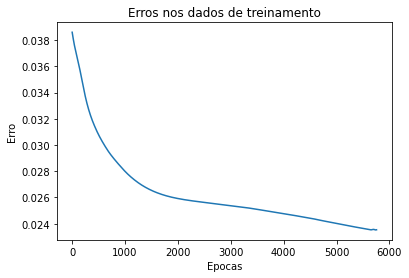

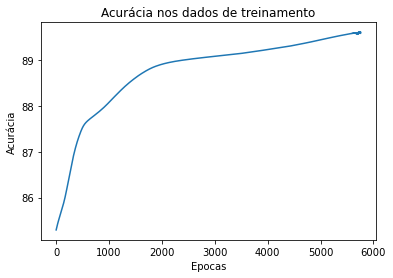

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.6min ->Neuronios atualizados, erro atual: 0.023437047377228737 acuracia: 89.62293015469274
1.2min ->Neuronios atualizados, erro atual: 0.023374082520604134 acuracia: 89.63513831430433
A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.09000000000000001
Erro: 0.02339317463338375
Acuracia: 89.62699499586564


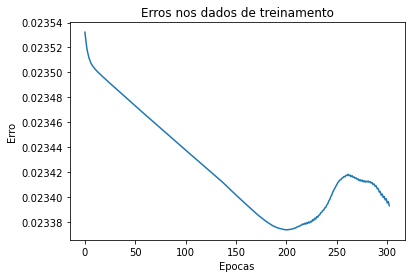

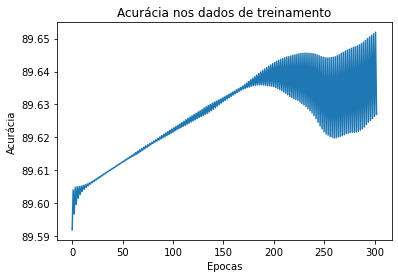

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.6min ->Neuronios atualizados, erro atual: 0.02329673059284687 acuracia: 89.65939435657835
1.2min ->Neuronios atualizados, erro atual: 0.023229442536830902 acuracia: 89.67901902295205
1.8min ->Neuronios atualizados, erro atual: 0.02317815087735653 acuracia: 89.68632902967842
2.4min ->Neuronios atualizados, erro atual: 0.023158663883805275 acuracia: 89.71114958213589
3.0min ->Neuronios atualizados, erro atual: 0.023130636662244797 acuracia: 89.69736583625848
3.6min ->Neuronios atualizados, erro atual: 0.023062916472554207 acuracia: 89.74273452955245
4.2min ->Neuronios atualizados, erro atual: 0.02300051972270012 acuracia: 89.73332008340901
4.9min ->Neuronios atualizados, erro atual: 0.02298368513584137 acuracia: 89.77292678942477
5.5min ->Neuronios atualizados, erro atual: 0.02291874587535858 acuracia: 89.76003495477445
6.1min ->Neuronios atualizados, erro 

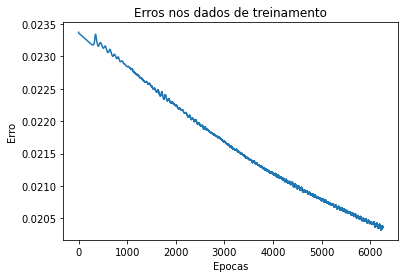

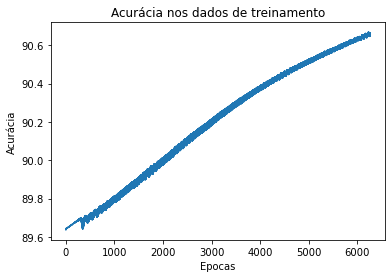

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.5min ->Neuronios atualizados, erro atual: 0.019955895841121674 acuracia: 90.72850731941038
A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.07000000000000002
Erro: 0.02012728527188301
Acuracia: 90.69769951609511


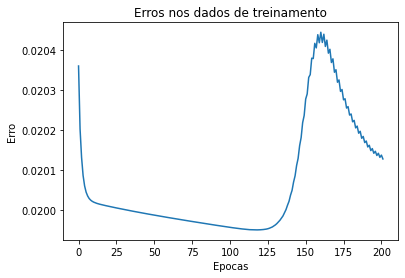

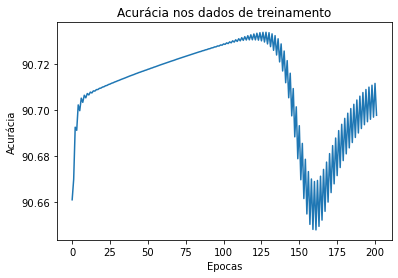

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.5min ->Neuronios atualizados, erro atual: 0.019908351823687553 acuracia: 90.74490929469764
1.0min ->Neuronios atualizados, erro atual: 0.019865160807967186 acuracia: 90.75759983879102
A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.06000000000000002
Erro: 0.02002374455332756
Acuracia: 90.72907749358022


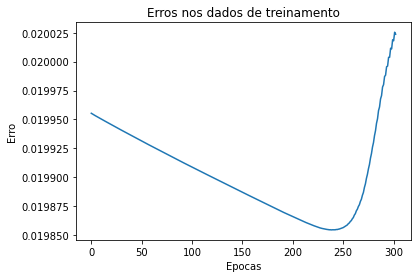

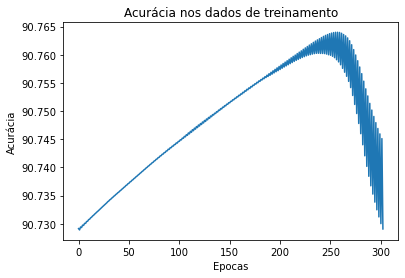

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.5min ->Neuronios atualizados, erro atual: 0.019829224795103073 acuracia: 90.76825616769673
1.0min ->Neuronios atualizados, erro atual: 0.019794905558228493 acuracia: 90.77829967973736
1.5min ->Neuronios atualizados, erro atual: 0.019761526957154274 acuracia: 90.78767597714005
2.1min ->Neuronios atualizados, erro atual: 0.01972891204059124 acuracia: 90.79716041300573
2.6min ->Neuronios atualizados, erro atual: 0.01970311999320984 acuracia: 90.80358641137548
A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.05000000000000002
Erro: 0.019763750955462456
Acuracia: 90.79308639622809


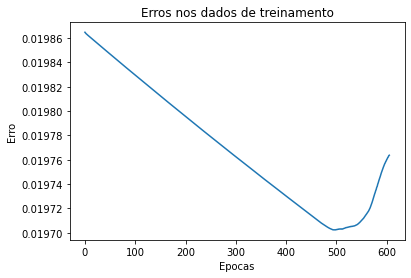

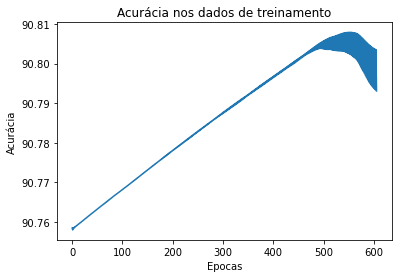

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.5min ->Neuronios atualizados, erro atual: 0.01967070810496807 acuracia: 90.81295516879102
1.0min ->Neuronios atualizados, erro atual: 0.019645435735583305 acuracia: 90.81962857469327
1.5min ->Neuronios atualizados, erro atual: 0.019620412960648537 acuracia: 90.82640979573209
2.0min ->Neuronios atualizados, erro atual: 0.019595688208937645 acuracia: 90.83297054071224
2.6min ->Neuronios atualizados, erro atual: 0.019571172073483467 acuracia: 90.83964430154
3.1min ->Neuronios atualizados, erro atual: 0.019546907395124435 acuracia: 90.84596274868512
3.6min ->Neuronios atualizados, erro atual: 0.01952286995947361 acuracia: 90.85258440690541
4.1min ->Neuronios atualizados, erro atual: 0.019499456509947777 acuracia: 90.85840587468955
4.6min ->Neuronios atualizados, erro atual: 0.019477415829896927 acuracia: 90.86541949535687
5.2min ->Neuronios atualizados, erro 

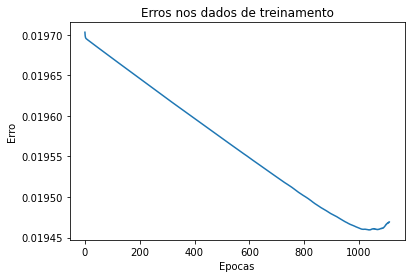

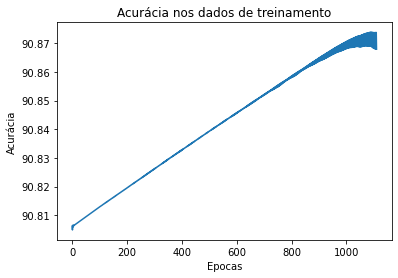

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.5min ->Neuronios atualizados, erro atual: 0.019433457404375076 acuracia: 90.87605358150358
1.0min ->Neuronios atualizados, erro atual: 0.01941578835248947 acuracia: 90.8808235448351
1.5min ->Neuronios atualizados, erro atual: 0.01939808577299118 acuracia: 90.88552285491943
2.0min ->Neuronios atualizados, erro atual: 0.01938057318329811 acuracia: 90.89013746984416
2.6min ->Neuronios atualizados, erro atual: 0.019363224506378174 acuracia: 90.89445912982538
3.1min ->Neuronios atualizados, erro atual: 0.019345933571457863 acuracia: 90.89884741396406
3.6min ->Neuronios atualizados, erro atual: 0.019328713417053223 acuracia: 90.9031670449178
4.1min ->Neuronios atualizados, erro atual: 0.01931164413690567 acuracia: 90.90779565104377
4.6min ->Neuronios atualizados, erro atual: 0.0192947406321764 acuracia: 90.91219660399672
5.2min ->Neuronios atualizados, erro atu

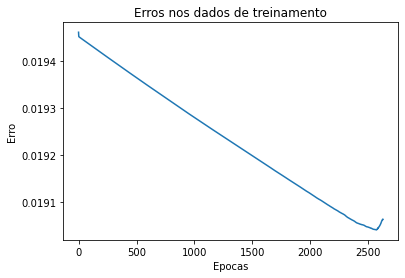

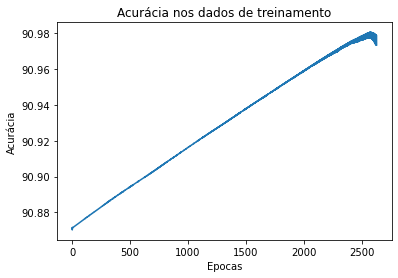

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
0.5min ->Neuronios atualizados, erro atual: 0.0190226212143898 acuracia: 90.98264092246157
1.0min ->Neuronios atualizados, erro atual: 0.019011765718460083 acuracia: 90.9854253215963
1.5min ->Neuronios atualizados, erro atual: 0.0190009456127882 acuracia: 90.98818666436014
2.0min ->Neuronios atualizados, erro atual: 0.018990175798535347 acuracia: 90.99095265216765
2.6min ->Neuronios atualizados, erro atual: 0.01897948980331421 acuracia: 90.99362913901246
3.1min ->Neuronios atualizados, erro atual: 0.018968870863318443 acuracia: 90.99629171467704
3.6min ->Neuronios atualizados, erro atual: 0.018958304077386856 acuracia: 90.99886948151179
4.1min ->Neuronios atualizados, erro atual: 0.018947767093777657 acuracia: 91.0014517901498
4.6min ->Neuronios atualizados, erro atual: 0.01893722079694271 acuracia: 91.00402749750081
5.2min ->Neuronios atualizados, erro atu

KeyboardInterrupt: 

In [36]:

Epocas=10000
Aprendizado=0.1
while(Aprendizado>0):
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    qEpocas,roboQuadrupede=treinamento(Epocas,roboQuadrupede,Aprendizado,"15.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")
    Aprendizado=Aprendizado-0.01

print("O modelo foi capaz de aprender até a epoca "+str(qEpocas)+" para a taxa de aprendizado de "+ str(Aprendizado))

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.04
Erro: 0.01910034567117691
Acuracia: 90.99861069580521


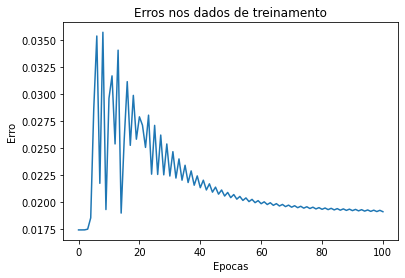

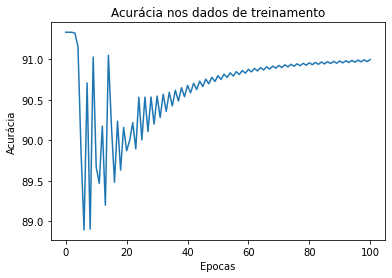

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.03
Erro: 0.018754972144961357
Acuracia: 91.079302114491


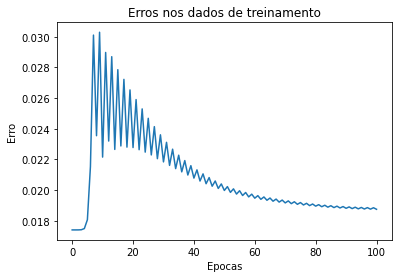

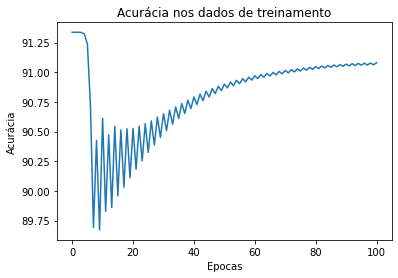

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
A rede neural nao pode mais aprender com a taxa de aprendizado lr=0.019999999999999997
Erro: 0.01824018359184265
Acuracia: 91.18996513853251


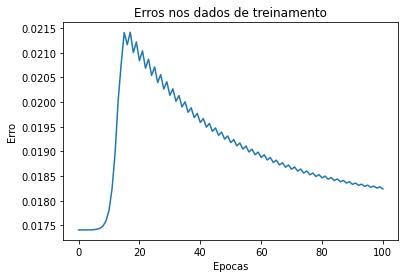

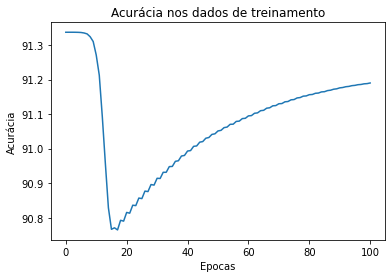

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306

Epoca: 101 Time: 0.4min ->Neuronios atualizados, erro atual: 0.01740356534719467 acuracia: 91.33814192311993

Epoca: 202 Time: 0.9min ->Neuronios atualizados, erro atual: 0.017397072166204453 acuracia: 91.33950765004047

Epoca: 303 Time: 1.5min ->Neuronios atualizados, erro atual: 0.017390567809343338 acuracia: 91.34086971111684

Epoca: 404 Time: 2.0min ->Neuronios atualizados, erro atual: 0.017384089529514313 acuracia: 91.34224098571086


In [ ]:

Epocas=10000
Aprendizado=0.04
while(Aprendizado>0):
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    qEpocas,roboQuadrupede=treinamento(Epocas,roboQuadrupede,Aprendizado,"15.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")
    Aprendizado=Aprendizado-0.01

print("O modelo foi capaz de aprender até a epoca "+str(qEpocas)+" para a taxa de aprendizado de "+ str(Aprendizado))

In [ ]:


def extrairComandos(indice,dados):
    vetor=dados[indice]
    DADOS_I_0=vetor[70:105]
    
    return DADOS_I_0[12:24]
    
def construirProximaEntrada(EM,CM,Gy,Ac,Temp,HSR,X,Y,Z):
    entrada=[]
    
    for k in EM:
        entrada.append(k)
    for k in CM:
        entrada.append(k)
    for k in Gy:
        entrada.append(k)
    for k in Ac:
        entrada.append(k)
    
    entrada.append(Temp)
    entrada.append(HSR)
    entrada.append(X)
    entrada.append(Y)
    entrada.append(Z)
    
    return entrada

def calcularErroPropagado(vetorPrevisto, vetorEsperado):
    variacao=np.array(vetorPrevisto)-np.array(vetorEsperado)
    
    erro=[]

    
    for v in variacao:
        
        erro.append(np.abs(v.item()))
       
    
    return np.array(erro)
   
    
def teste(modelo,arquivo,Q):
    import random
    xTeste,yTeste=gerarDadosTrain(arquivo)
    tamanhoVetorTeste=len(xTeste)
    indice = random.randint(0,tamanhoVetorTeste-1)
    print("Amostra sorteada: "+str(indice))
    if((tamanhoVetorTeste-indice-1)<Q):
        Q=tamanhoVetorTeste-indice-1

    posicaoInicialRobo=xTeste[indice]
    print("___________________________________________Condições Inicial__________________________________________________________")
    
    DADOS_I_2=np.array(posicaoInicialRobo[0:35])
    DADOS_I_1=np.array(posicaoInicialRobo[35:70])
    DADOS_I_0=np.array(posicaoInicialRobo[70:105])

    
    print("Posicao dos motores: ")
    print(DADOS_I_0[0:12])
    print("Comando dado aos motores: ")
    print(DADOS_I_0[12:24])
    print("Giroscópio(GyX, GyY, GyZ): ")
    print(DADOS_I_0[24:27])
    print("Acelerometro(AcX, AcY, AcZ): ")
    print(DADOS_I_0[27:30])

    print("Temperatura[i-2]: ")
    print(DADOS_I_0[30])

    print("Ultrassonico[i-2]: ")
    print(DADOS_I_0[31])

    print("Inclinação(x,y,z)[i-2]: ")
    print(DADOS_I_0[32:35])
    
 
    Xh,Yh,Zh=[],[],[]
    X, Y, Z=[],[],[]
    
    Xh.append(DADOS_I_0[32])
    Yh.append(DADOS_I_0[33])
    Zh.append(DADOS_I_0[34])

    X.append(DADOS_I_0[32])
    Y.append(DADOS_I_0[33])
    Z.append(DADOS_I_0[34])
    
    while(indice<(tamanhoVetorTeste-1)):
      
        entrada=[]
        
        for k in DADOS_I_2:
            entrada.append(k)
        for k in DADOS_I_1:
            entrada.append(k)
        for k in DADOS_I_0:
            entrada.append(k)
        
        
        E=torch.from_numpy(np.array(entrada,dtype=np.float)).float()#testeval
        S=modelo.forward(E)
        
        
        vetorPrevisto=transformarSaida(S)
        saidaEsperada=transformarSaida(yTeste[indice])
        
        EM=vetorPrevisto[0:12]
        Gy=vetorPrevisto[12:15]
        Ac=vetorPrevisto[15:18]
        Temp=vetorPrevisto[18]
        HSR=vetorPrevisto[19]
        XP=vetorPrevisto[20]
        YP=vetorPrevisto[21]
        ZP=vetorPrevisto[22]
    
        CM=extrairComandos((indice+1),xTeste)
        
        
        DADOS_I_2=DADOS_I_1
        DADOS_I_1=DADOS_I_0
        DADOS_I_0=construirProximaEntrada(EM,CM,Gy,Ac,Temp,HSR,XP,YP,ZP)
        
        
        XR=saidaEsperada[20]
        YR=saidaEsperada[21]
        ZR=saidaEsperada[22]
#         print(XR.item(),XP.item())
        
        Xh.append(XP)
        Yh.append(YP)
        Zh.append(ZP)
        
        X.append(XR)
        Y.append(YR)
        Z.append(ZR)
        
        indice=indice+1
    
    
    
    plt.figure(figsize=[18,5])   
    plt.title("X,y,z") 
    plt.plot(Xh,label="X previsto",c='r')
    plt.plot(X,label="X Real",c='r')
    plt.plot(Yh,label="Y previsto",c='g')
    plt.plot(Y,label="Y Real",c='g')
    plt.plot(Zh,label="Z previsto",c='b')
    plt.plot(Z,label="Z Real",c='b')
    plt.xlim([0,Q])
    plt.legend()
    plt.show()


    plt.figure(figsize=[18,5])   
    plt.title("X")
    plt.plot(Xh,label="X previsto")
    plt.plot(X,label="X Real")
    plt.xlim([0, Q])
    plt.legend()
    plt.show()
    
    plt.figure(figsize=[18,5])   
    plt.title("Y")
    plt.plot(Yh,label="Y previsto")
    plt.plot(Y,label="Y Real")
    plt.xlim([0, Q])
    plt.legend()
    plt.show() 
    
    plt.figure(figsize=[18,5])   
    plt.title("Z")
    plt.plot(Zh,label="Z previsto")
    plt.plot(Z,label="Z Real")
    plt.xlim([0, Q])
    plt.legend()
    plt.show()
    
    erroX=calcularErroPropagado(X,Xh)
    erroY=calcularErroPropagado(Y,Yh)
    erroZ=calcularErroPropagado(Z,Zh)
    
    erro=(erroX+erroY+erroZ)/3
    

    
    
    return erro


In [ ]:

passos = 2# quantidade de passos que pretendo prever

erro11=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro11)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
Amostra sorteada: 1161
___________________________________________Condições Inicial__________________________________________________________
Posicao dos motores: 
[ 67.  87.  60.  77.  85.  92. 110.  79.  94.  70.  86.  82.]
Comando dado aos motores: 
[ 67.  87.  60.  77.  85.  92. 110.  79.  94.  70.  86.  82.]
Giroscópio(GyX, GyY, GyZ): 
[24.8  -2.47  3.44]
Acelerometro(AcX, AcY, AcZ): 
[ 0.49  1.51 -2.11]
Temperatura[i-2]: 
28.15
Ultrassonico[i-2]: 
67.52
Inclinação(x,y,z)[i-2]: 
[ -62.6  -179.24    6.52]


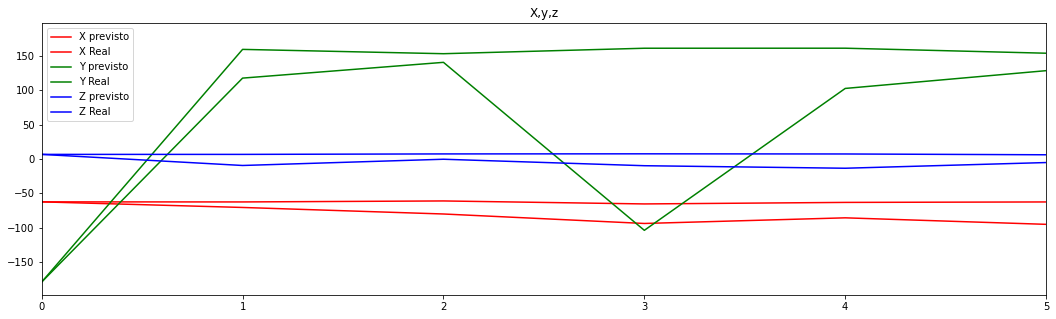

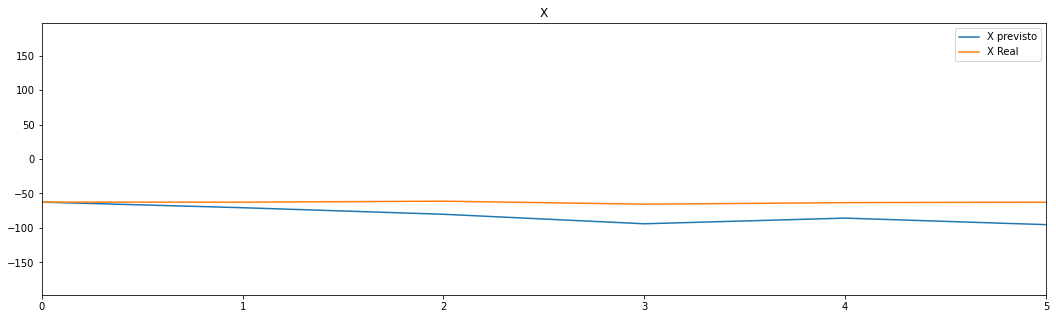

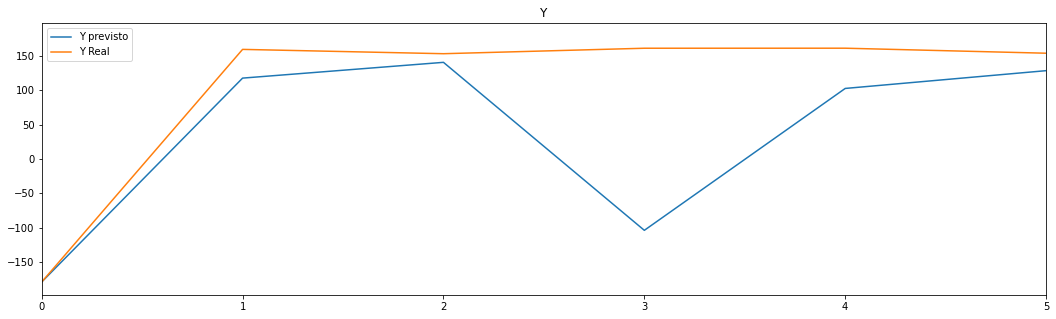

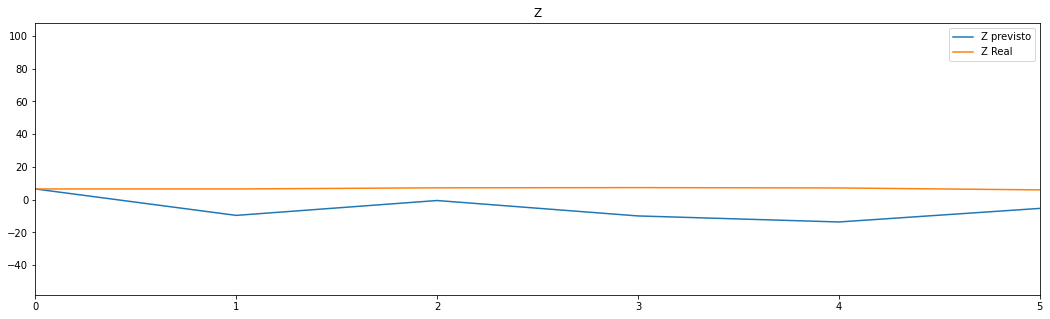

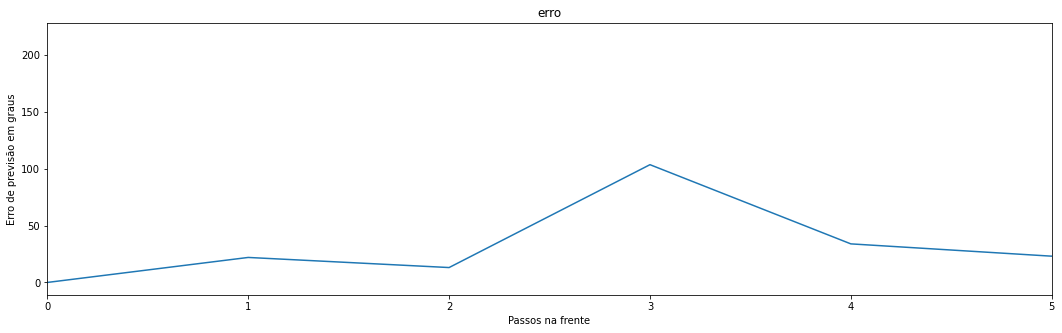

In [105]:

passos = 5# quantidade de passos que pretendo prever

erro11=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro11)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
Amostra sorteada: 1592
___________________________________________Condições Inicial__________________________________________________________
Posicao dos motores: 
[ 66.  95.  97.  82.  66.  80. 116.  99.  97.  80. 115.  73.]
Comando dado aos motores: 
[ 66.  95.  97.  82.  66. 115. 116.  99.  97.  80. 115.  73.]
Giroscópio(GyX, GyY, GyZ): 
[  9.15   1.09 -12.08]
Acelerometro(AcX, AcY, AcZ): 
[-0.16  2.8   0.03]
Temperatura[i-2]: 
28.2
Ultrassonico[i-2]: 
73.14
Inclinação(x,y,z)[i-2]: 
[ -87.87 -161.02   24.1 ]


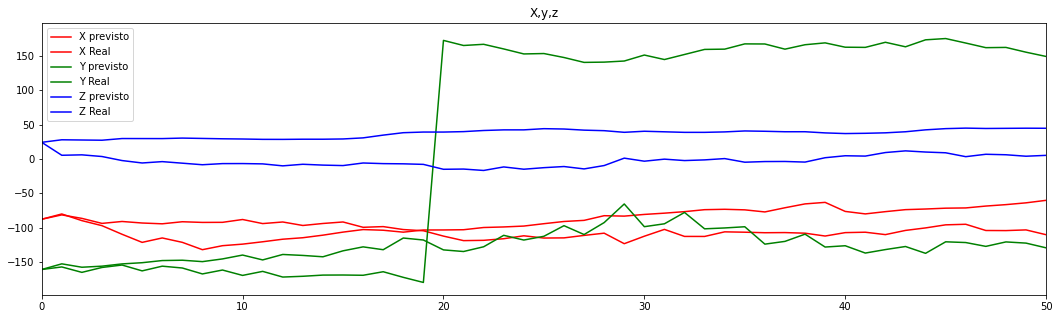

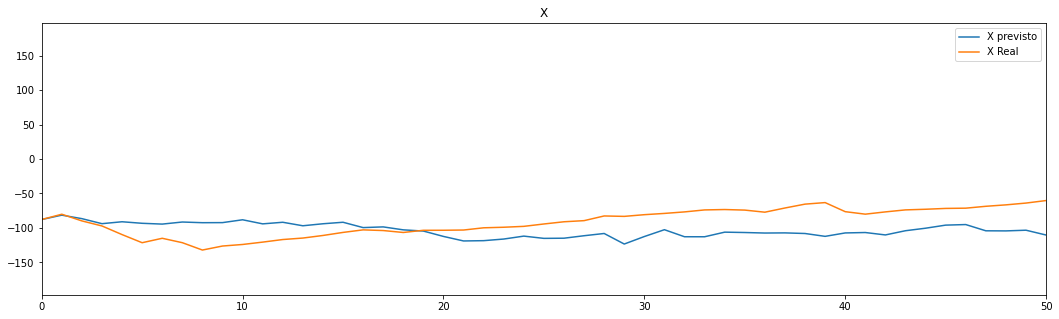

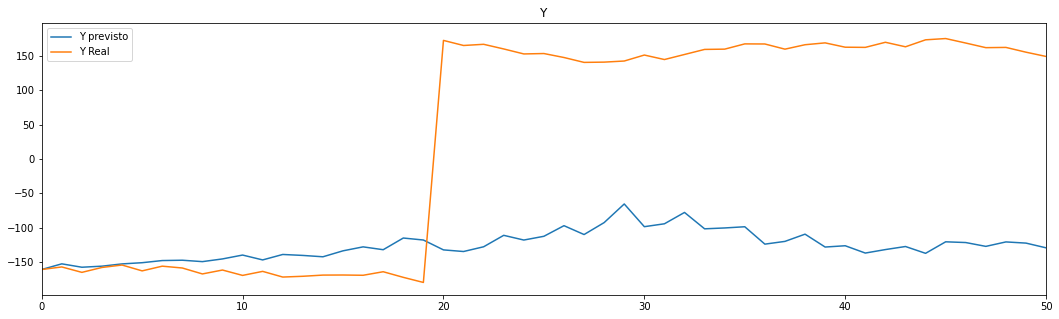

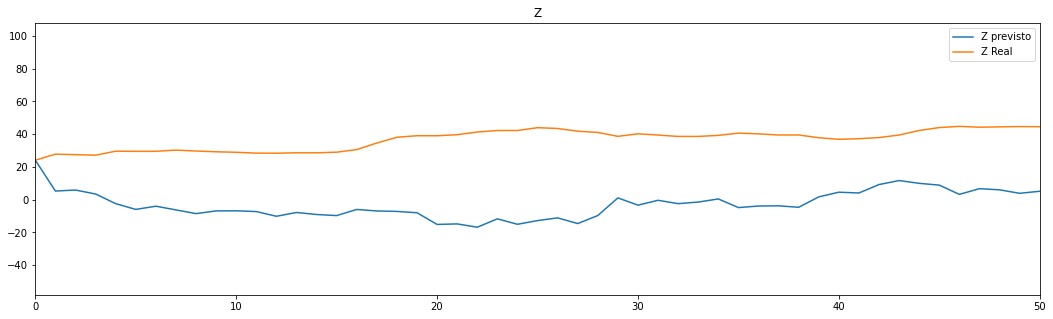

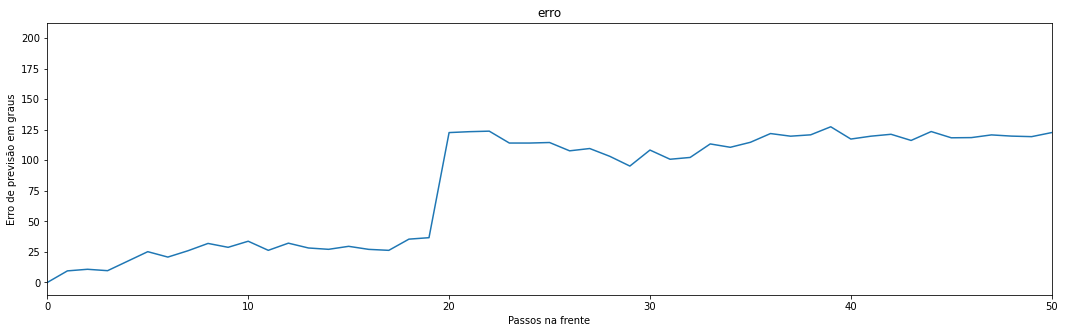

In [113]:

passos = 50# quantidade de passos que pretendo prever

erro11=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro11)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
Amostra sorteada: 1318
___________________________________________Condições Inicial__________________________________________________________
Posicao dos motores: 
[ 81.  89. 112.  64.  93.  89. 101.  90. 101.  88.  85. 103.]
Comando dado aos motores: 
[ 81.  89. 112.  64.  93.  89. 101.  90. 101.  88.  85. 103.]
Giroscópio(GyX, GyY, GyZ): 
[26.71 -2.13 46.78]
Acelerometro(AcX, AcY, AcZ): 
[ 0.48  2.8  -0.13]
Temperatura[i-2]: 
28.15
Ultrassonico[i-2]: 
72.53
Inclinação(x,y,z)[i-2]: 
[-139.99  136.56   17.23]


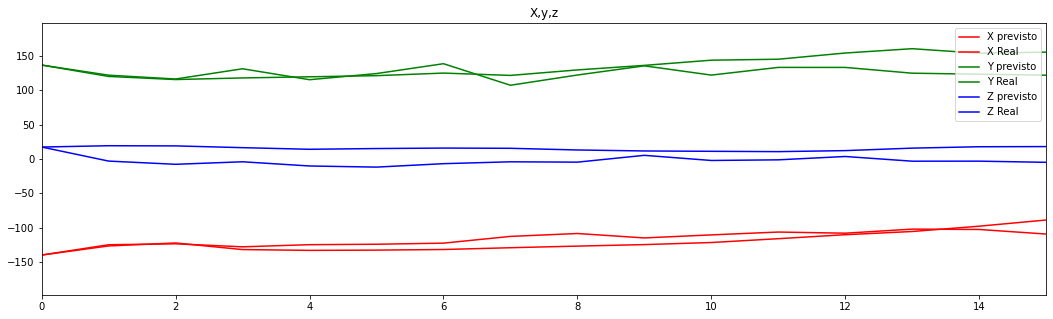

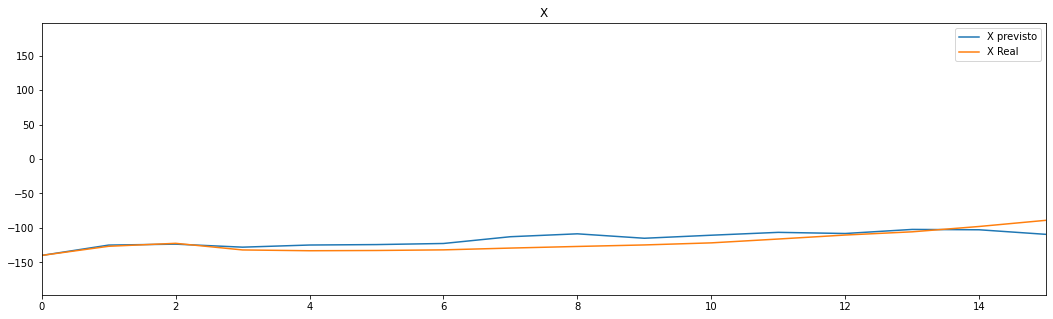

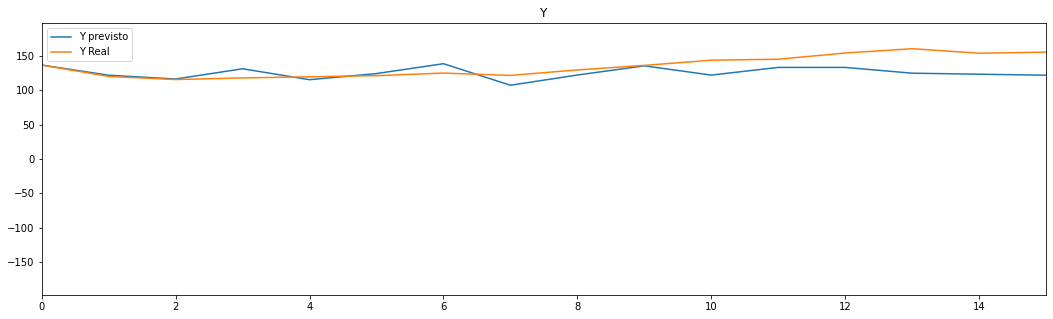

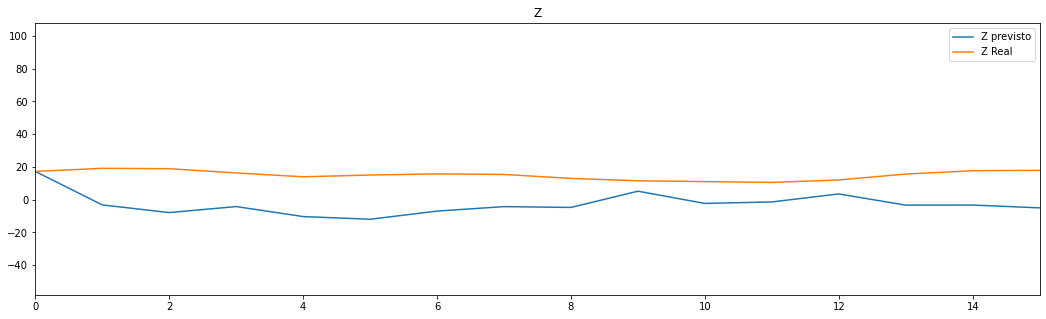

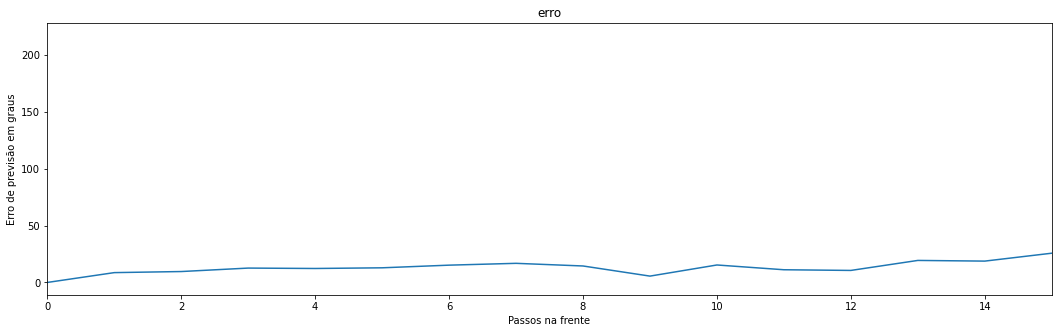

In [117]:

passos = 15# quantidade de passos que pretendo prever

erro11=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro11)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

Dados de treinamento criados a partir do arquivo 15.txt
Tamanho das entradas: 105
Tamanho das saídas: 23
Quantidade de dados: 2306
Amostra sorteada: 1051
___________________________________________Condições Inicial__________________________________________________________
Posicao dos motores: 
[ 73.  62.  64. 103.  78.  81.  86. 109. 111.  84.  67. 106.]
Comando dado aos motores: 
[ 73.  62.  64. 103.  78.  81.  86. 109. 111.  84.  67. 106.]
Giroscópio(GyX, GyY, GyZ): 
[  8.61 -24.61  -8.81]
Acelerometro(AcX, AcY, AcZ): 
[ 0.49  5.34 -0.91]
Temperatura[i-2]: 
28.15
Ultrassonico[i-2]: 
72.02
Inclinação(x,y,z)[i-2]: 
[-40.06 -98.19   0.74]


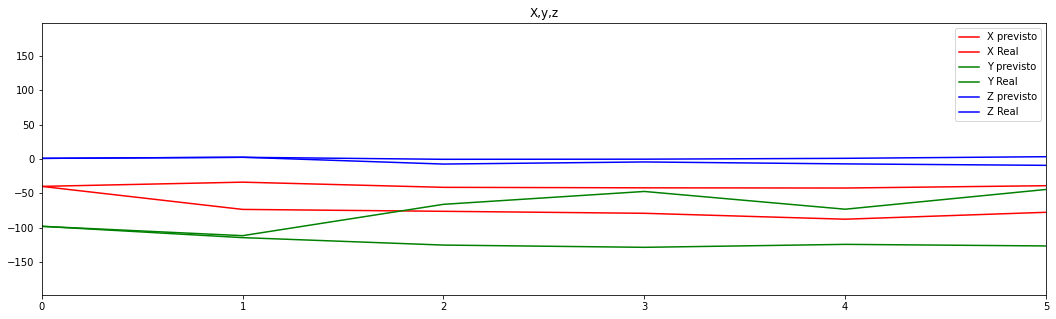

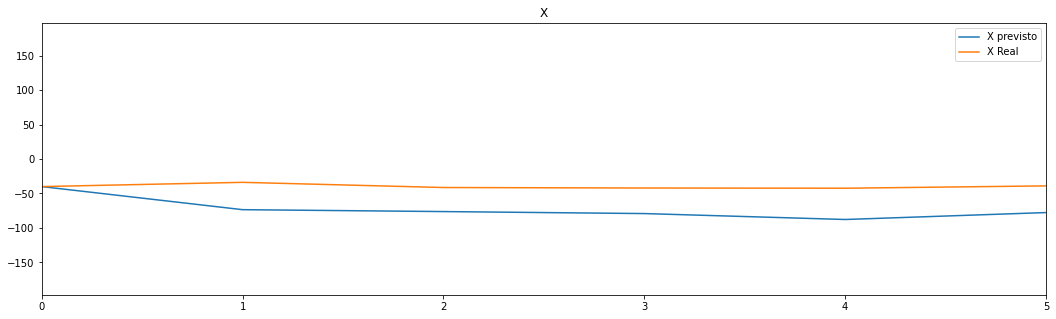

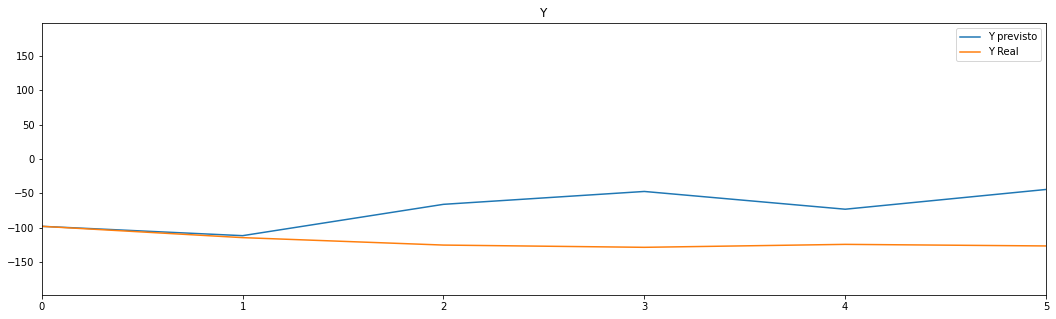

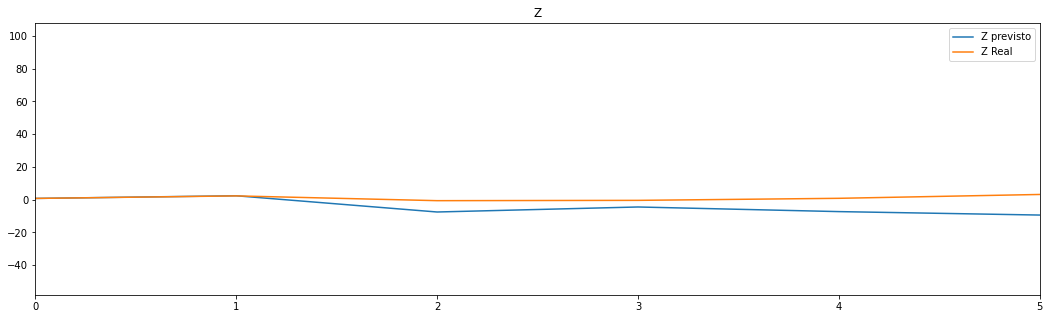

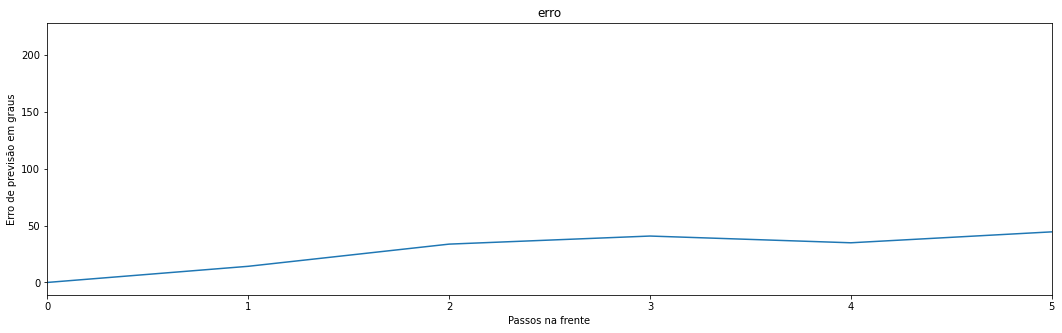

In [120]:

passos = 5# quantidade de passos que pretendo prever

erro11=teste(roboQuadrupede,"15.txt",passos)

plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro11)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()